# P2P Default Binary Classification | Supervised Learning

Hypothesis:

    H0 - Null hypothesis, when the model cannot beat the null accuracy score for "Fully Paid" & "Charged Off" loans
    H1 - Reject the Null hypothesis, when accuracy, precision and recall scores can beat the null accuracy score.

True Positives (TP): Number of correct positive predictions | correctly predicted loan will Charged Off (1)
True Negatives (TN): Number of correct negative predictions | correctly predicted loan will be Fully Paid (0)
False Positives (FP): Number incorrect positive predictions | incorrectly predicted loan will be Charged Off
False Negatives (FN): Number of incorrect negative predictions | incorrectly predicted loan will be Fully Paid

Goals:

I'm planning to select a supervised learning model to see what features attribute to a loan default(binary classification). (TP+TN)/Total Population is the Accuracy (ACC) score bench mark in comparison of each model. 
I have Lending Club's 2015 dataset with 145 loan characteristics, and 400k+ records to begin with.
The dataset is relatively large, and data is very sparse - possibly very redundant features. 

Feature engineering will be a challenge, and we want to know whether or not the user will default or not based on their application information, and not based on Lending Club's collected data once the loan is issued. This is also the reason for an older dataset where we already know if they have successfully paid off their loan or have defaulted under the "loan_status" field. 
I used to work for Lending Club's Investor Group, and would be interested in demystifying the underwriting model, and which types have highest tendencies to default. 

Notes: 

Use Control +F to find the most important sections:
    - "XG/GBM Model"
    - "GBM Domain Knowledge Test"
    - "PCA | AdaBoost"
    - "Decision Tree model selection w/ random subset of features"
    - "
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from time import time
import pandas as pd;

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# Read in data:

df = pd.read_csv("/Users/Darrenklee/Desktop/DS-Project/LoanStats3d.csv", low_memory= False)

# Exploratory Data Analysis

In [3]:
df.application_type.value_counts()
# do not include Joint Apps

Individual    420584
Joint App        511
Name: application_type, dtype: int64

In [8]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,210994.000000,210994.000000,210994.000000,210994.000000,2.109940e+05,0.0,210992.000000,210994.000000,210994.000000,109046.000000,...,153.0,153.000000,153.0,153.000000,16.000000,153.000000,153.000000,4583.000000,4583.000000,4583.000000
mean,14949.374508,14949.374508,14943.359854,443.917652,7.662230e+04,NaN,18.876317,0.335246,0.637919,34.801790,...,3.0,126.561961,3.0,18.294118,316.113750,9849.725556,179.584314,5731.476498,49.000343,12.094043
std,8562.173794,8562.173794,8558.678600,250.949787,7.178636e+04,NaN,8.704507,0.921001,0.918971,22.126952,...,0.0,105.504755,0.0,8.282736,209.439967,6641.912773,164.910743,3864.310434,7.458421,8.380446
min,1000.000000,1000.000000,900.000000,14.010000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,...,3.0,2.690000,3.0,0.000000,57.420000,239.790000,0.440000,198.000000,20.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,261.880000,4.667350e+04,NaN,12.350000,0.000000,0.000000,16.000000,...,3.0,40.490000,3.0,13.000000,154.522500,4639.090000,44.080000,2740.850000,45.000000,4.000000
50%,13200.000000,13200.000000,13200.000000,385.360000,6.500000e+04,NaN,18.320000,0.000000,0.000000,32.000000,...,3.0,94.200000,3.0,21.000000,250.770000,8343.420000,128.990000,4897.000000,47.040000,12.000000
75%,20000.000000,20000.000000,20000.000000,586.035000,9.100000e+04,NaN,25.012500,0.000000,1.000000,52.000000,...,3.0,184.810000,3.0,25.000000,453.667500,13905.000000,274.370000,7751.310000,50.010000,18.000000
max,35000.000000,35000.000000,35000.000000,1445.460000,8.900060e+06,NaN,380.530000,39.000000,6.000000,176.000000,...,3.0,569.750000,3.0,29.000000,699.480000,28078.200000,798.390000,30000.000000,166.670000,65.000000


In [114]:
numerics

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'url',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op

In [4]:
df.loan_status.value_counts()

Current               196354
Fully Paid            155420
Charged Off            55574
Late (31-120 days)      7647
In Grace Period         4692
Late (16-30 days)       1387
Default                   21
Name: loan_status, dtype: int64

In [4]:
# We will only work with loans that have been "Fully Paid", and those that "Charged Off". 
df = df[df.loan_status != "Current"]
df = df[df.loan_status != "Late (31-120 days)"]
df = df[df.loan_status != "In Grace Period"]
df = df[df.loan_status != "Late (16-30 days)"]
df = df[df.loan_status != "Default"]

In [6]:
df.shape
# cuts the dataset responses in half.

(210994, 143)

In [7]:
#"loan_status" will be the target variable. ~74% null accuracy is what we need to beat with our model
df.loan_status.value_counts(normalize=True)*100

Fully Paid     73.660862
Charged Off    26.339138
Name: loan_status, dtype: float64

In [237]:
df.emp_title.nunique()
# we will attempt to use NLP for model improvements when possible. There's reason to believe that there's a 
# direct impact on the ability to pay back a loan based on a borrower's job title. 

120811

In [238]:
df.emp_title.head()

0                     Master mechanic
1    Emergency Department technician 
2                          Supervisor
3                             Teacher
4                Program Coordinator 
Name: emp_title, dtype: object

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
df["int_rate"] = df.int_rate.str.replace("%", "")  
df["int_rate"] = df.int_rate.astype(float)

In [137]:
print df.int_rate.mean()
print df.loan_amnt.mean()

12.5997940133
15240.2858619


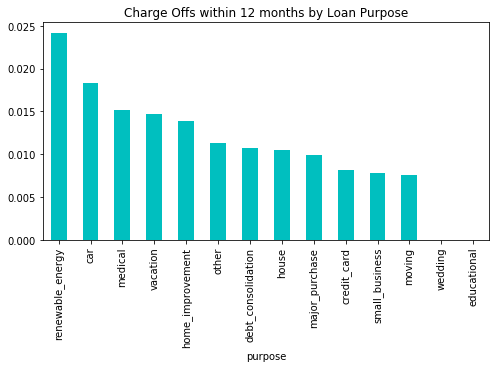

In [8]:
df.groupby("purpose")["chargeoff_within_12_mths"].mean().sort_values(ascending= False).plot(kind="bar", figsize=(8,4), 
                                           title = "Charge Offs within 12 months by Loan Purpose", color = "c")
plt.show();
#we can see which types of borrowers are most irresponsible. 

['debt_consolidation' 'car' 'small_business' 'house' 'credit_card'
 'home_improvement' 'major_purchase' 'vacation' 'other' 'moving' 'medical'
 'renewable_energy' 'wedding' 'educational']


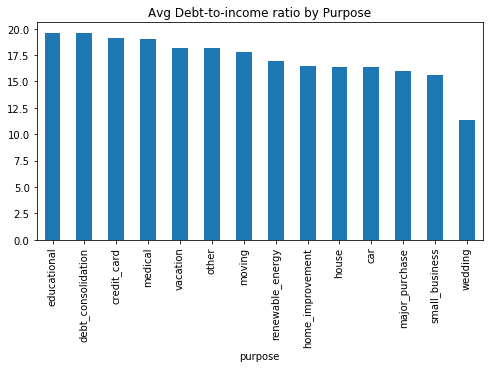

In [219]:
print df.purpose.unique()

df.groupby("purpose")["dti"].mean().sort_values(ascending= False).plot(kind="bar", figsize=(8,4), 
                                           title = "Avg Debt-to-income ratio by Purpose")
plt.show();

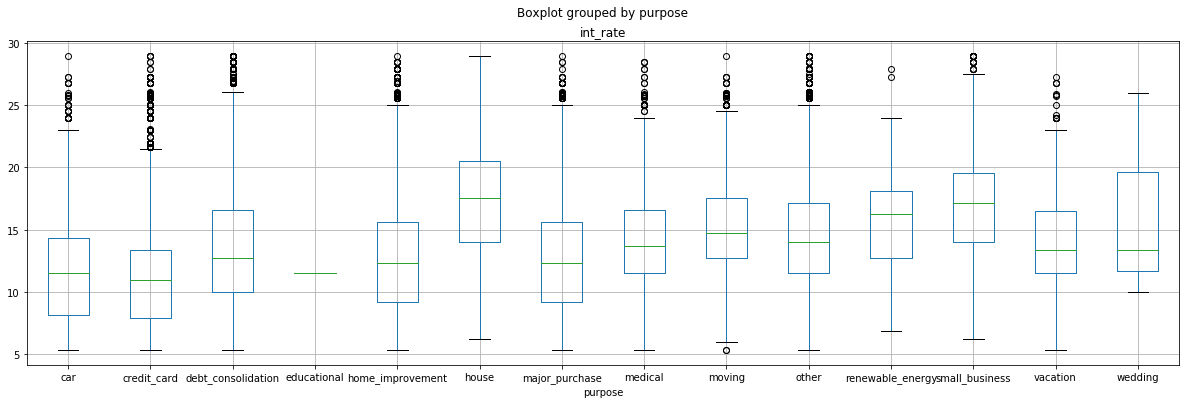

In [220]:
#boxplot
df.boxplot(column="int_rate", by="purpose", figsize=(20, 6))
plt.show();

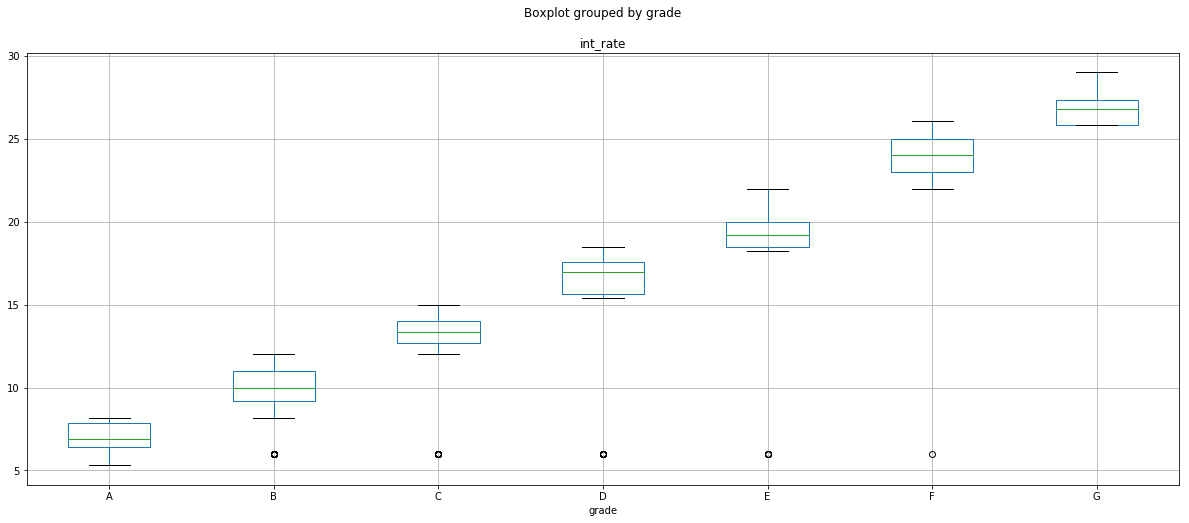

In [221]:
#boxplot
df.boxplot(column="int_rate", by="grade", figsize=(20, 8))
plt.show();

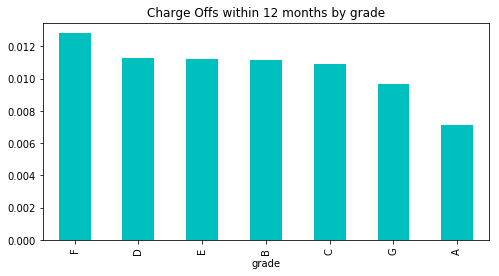

In [7]:
df.groupby("grade")["chargeoff_within_12_mths"].mean().sort_values(ascending= False).plot(kind="bar", figsize=(8,4), 
                                           title = "Charge Offs within 12 months by grade", color = "c");

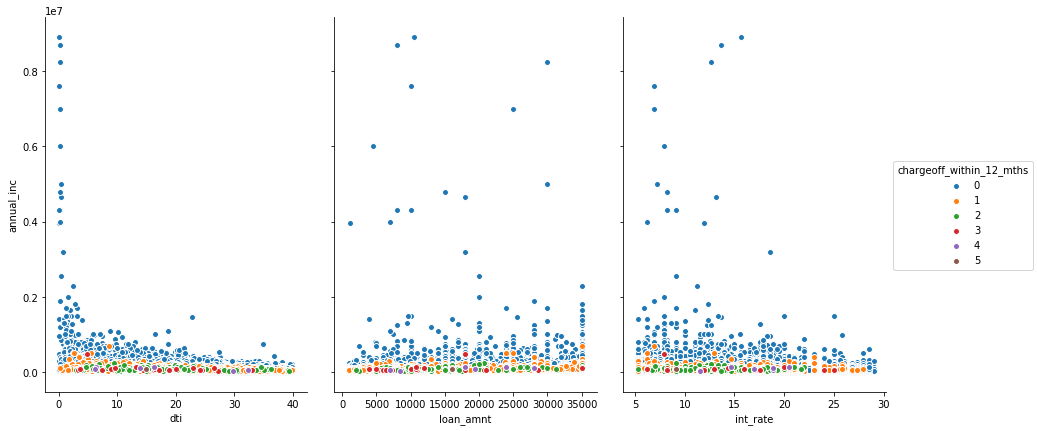

In [223]:
# scatter plot in Seaborn
sns.pairplot(data = df, x_vars=['dti','loan_amnt','int_rate'], 
             y_vars='annual_inc', size=6, hue = 'chargeoff_within_12_mths', aspect=0.7);

In [195]:
lcdf.out_prncp.mean()
#drop!

0.0

In [219]:
df.purpose.value_counts(normalize = True)

debt_consolidation    0.593738
credit_card           0.242285
home_improvement      0.060065
other                 0.045605
major_purchase        0.017690
medical               0.009352
car                   0.008231
small_business        0.007989
moving                0.005747
vacation              0.005341
house                 0.003415
renewable_energy      0.000532
wedding               0.000009
educational           0.000002
Name: purpose, dtype: float64

Null items is a big part of the entire dataset that Lending Club offers. I was hoping to use "desc" for further NLP machine learning techniques. A lot of this information is about Secondary applicants such as the spouse of the applicant. From my knowledge, there are many null values because it was introduced some time later than when the data collection began. 

"Hardship_", "Settlement_" is a huge predictor value, and is unknown at the time of the application process. The "payment_plan_start_date" column is a huge indicator based on my domain knowledge. 

"emp_title" will be used in an attempt via NLP!

In [203]:
null_col = df.isnull().sum().sort_values(ascending = False)
null_col.head(n = 60)
# remove high null value features.

sec_app_collections_12_mths_ex_med            421095
sec_app_mort_acc                              421095
sec_app_revol_util                            421095
sec_app_open_act_il                           421095
sec_app_num_rev_accts                         421095
sec_app_chargeoff_within_12_mths              421095
sec_app_inq_last_6mths                        421095
sec_app_mths_since_last_major_derog           421095
sec_app_open_acc                              421095
revol_bal_joint                               421095
sec_app_earliest_cr_line                      421095
url                                           421095
desc                                          421050
dti_joint                                     420586
verification_status_joint                     420584
annual_inc_joint                              420584
orig_projected_additional_accrued_interest    419547
hardship_payoff_balance_amount                419305
hardship_reason                               

In [12]:
# number of personal finance inquiries
# we do not have enough data on this, and would be a nice indicator to have
# cannot impute mean or median since NaN is very high

print df.inq_fi.value_counts(dropna = False)
print "\n"
print df.inq_fi.median()
print df.inq_fi.mean()

NaN      399723
 0.0      11411
 1.0       5009
 2.0       2530
 3.0       1119
 4.0        589
 5.0        354
 6.0        165
 7.0         91
 8.0         42
 9.0         23
 10.0        13
 11.0        11
 13.0         5
 12.0         5
 14.0         2
 15.0         1
 17.0         1
 16.0         1
Name: inq_fi, dtype: int64


0.0
0.943945349055


In [10]:
#created a csv to see full list of features with a lot of null values. 
#Dropped all features with high null values counts

null_col.to_csv('null_col.csv')

In [45]:
print df.last_credit_pull_d.unique()
# field requires timeseries analysis, and we will exclude for now.

['Nov-17' 'Jun-16' 'Jun-17' 'Dec-16' 'Jan-17' 'Feb-17' 'Sep-17' 'Mar-17'
 'Oct-17' 'Aug-17' 'Jul-16' 'May-17' 'Mar-16' 'Apr-17' 'Oct-16' 'Jul-17'
 'Aug-16' 'Apr-16' 'Nov-16' 'Feb-16' 'Sep-16' 'Jan-16' 'May-16' 'Dec-15'
 nan 'Nov-15' 'Oct-15' 'Sep-15' 'Aug-15' 'Jul-15' 'Jun-15' 'May-15'
 'Apr-15' 'Mar-15' 'Feb-15' 'Jan-15' 'Dec-14']


In [110]:
non_numerics = [x for x in df.columns \
                if not (df[x].dtype == np.float64 \
                        or df[x].dtype == np.int64)]
numerics = [x for x in df.columns if x not in non_numerics]

In [13]:
non_numerics
# which one of these categorical fields do we need to turn into dummy variables?
# we see that there are some fields where active loans have recorded activity. What if we want 
# our lens to be focused on new loan application data instead? We will drop any categories that
# relate to monthly records or status for active loans.

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date']

# Good Feat

In [2]:
#pass in new subset of features

good_feat = ["num_tl_120dpd_2m",
"mo_sin_old_il_acct",
"percent_bc_gt_75",
"bc_util",
"bc_open_to_buy",
"dti",
"num_rev_accts",
"delinq_2yrs",
"inq_last_6mths",
"revol_bal",
"open_acc",
"pub_rec",
"total_acc",
"num_bc_tl",
"funded_amnt",
"int_rate",
"installment",
"home_ownership",
"annual_inc",
"total_rec_int",
"chargeoff_within_12_mths",
"num_sats",
"num_rev_tl_bal_gt_0",
"total_rev_hi_lim",
"num_op_rev_tl",
"num_il_tl",
"acc_open_past_24mths",
"avg_cur_bal",
"delinq_amnt",
"num_tl_90g_dpd_24m",
"mo_sin_old_rev_tl_op",
"mo_sin_rcnt_rev_tl_op",
"mo_sin_rcnt_tl",
"mort_acc",
"num_accts_ever_120_pd",
"num_actv_bc_tl",
"num_actv_rev_tl",
"num_tl_30dpd",
"num_tl_op_past_12m",
"total_il_high_credit_limit",
"num_bc_sats",
"collections_12_mths_ex_med",
"policy_code",
"total_bc_limit",
"pct_tl_nvr_dlq",
"total_bal_ex_mort",
"acc_now_delinq",
"tot_coll_amt",
"tot_cur_bal",
"tot_hi_cred_lim",
"tax_liens",
"pub_rec_bankruptcies",
"loan_amnt",
"total_pymnt",            
"revol_util",
"term",
"purpose",
"emp_length",
'loan_status',
'application_type',
'grade',
"emp_title"]



#manually removed:
#"recoveries", , "hardship_flag", "title", "total_rec_late_fee",
#"funded_amnt_inv", "issue_d", "verification_status", "grade", "sub_grade", "initial_list_status",
#"pymnt_plan", "debt_settlement_flag", "addr_state", "earliest_cr_line",
#"mths_since_recent_bc", "total_rec_prncp", "total_pymnt_inv", "out_prncp_inv",
#'last_pymnt_amnt','collection_recovery_fee','total_pymnt', "out_prncp", "last_credit_pull_d"

#drop:
#'sub_grade', 'verification_status', 'issue_d', 'pymnt_plan',  'title','zip_code','addr_state',
# 'earliest_cr_line',  'initial_list_status',  'last_pymnt_d', 'next_pymnt_d', 'desc',
#'verification_status_joint', 'hardship_flag','hardship_type','hardship_reason','hardship_status','
#hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_loan_status',
#'disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date'

#categorical(included in [good_feat]): will transform to dummies in df_fe function.
#"last_pymnt_d",
#'term','emp_length','home_ownership',
#'purpose', 'application_type'

# save for NLP if possible: 
# "emp_title"

In [11]:
df = pd.read_csv("/Users/Darrenklee/Desktop/DS-Project/LoanStats3d.csv")
df.term.value_counts()

 36 months    283173
 60 months    137922
Name: term, dtype: int64

In [3]:
#Create a function that will take unclean data, and apply feature engineering techniques

df = pd.read_csv("/Users/Darrenklee/Desktop/DS-Project/LoanStats3d.csv")
#good_feat eliminates all null columns
df = df[good_feat]
#we only want to focus on "Fully Paid" and "Charged Off" loans as target
df = df[df.loan_status != "Current"]
df = df[df.loan_status != "Late (31-120 days)"]
df = df[df.loan_status != "In Grace Period"]
df = df[df.loan_status != "Late (16-30 days)"]
df = df[df.loan_status != "Default"]
df = df[df.application_type != "Joint App"]
#0 for Fully Paid loans, and 1 for Charged Off loans
target_dict = {"Fully Paid":0, "Charged Off":1}
df["loan_status"] = df.loan_status.map(target_dict)

def length_decider(x):
    if x == "36 months":
        return 36
    else:
        return 60
    
def df_fe(df):
    df.dropna(inplace= True)
    df.drop("application_type", axis=1, inplace =True)
    #df.term = df.term.apply(length_decider)
    #df["term"] = df.term.astype(int)
    df["term"] = df.term.str.replace(" months", "")  
    df["term"] = df.term.astype(float)
    df["int_rate"] = df.int_rate.str.replace("%", "")  
    df["int_rate"] = df.int_rate.astype(float)
    df["revol_util"] = df.revol_util.str.replace("%", "")  
    df["revol_util"] = df.revol_util.astype(float)
    #create dummy variables for categorical data
    df_purpose_dums = pd.get_dummies(df.purpose, prefix = "purpose", drop_first=True)
    df = pd.concat([df, df_purpose_dums], axis = 1)
    df.drop("purpose", axis = 1, inplace=True)
    #df_term_dums = pd.get_dummies(df.term, prefix = "term", drop_first = True)
    #df = pd.concat([df, df_term_dums], axis = 1)
    #df.drop("term", axis = 1, inplace=True)
    df_emp_length_dums = pd.get_dummies(df.emp_length, prefix = "emp_length", drop_first = True)
    df = pd.concat([df, df_emp_length_dums], axis = 1)
    df.drop("emp_length", axis = 1, inplace=True)
    df_ownership_dums = pd.get_dummies(df.home_ownership, prefix = "ownership", drop_first = True)
    df = pd.concat([df, df_ownership_dums], axis = 1)
    df.drop("home_ownership", axis = 1, inplace=True)
    df.columns = df.columns.str.lower()
    #df.columns = df.columns.str.replace(" ", "_")
    #df.columns = df.columns.str.replace("-", "_")
    #df.columns = df.columns.str.replace("__", "_")
    #fico has high and low range columns, take average!
    #df["fico_average"] = df[["fico_high_range", "fico_low_range"]].mean(axis=1)
    return df

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
lcdf = df_fe(df)

In [69]:
grade_classes = lcdf.grade
emp_title_col = lcdf.emp_title
lcdf.drop(["grade", "emp_title"], axis = 1, inplace= True)

In [70]:
lcdf.shape

(183660, 82)

In [61]:
lcdf.term.value_counts()

36.0    128261
60.0     55399
Name: term, dtype: int64

In [16]:
lcdf.corr()["loan_status"].sort_values(ascending = False)[:15]
# which columns are higly correlated to our new binary loan_status?

loan_status             1.000000
int_rate                0.301775
term                    0.178857
dti                     0.153218
acc_open_past_24mths    0.105331
percent_bc_gt_75        0.102005
bc_util                 0.097616
num_actv_rev_tl         0.093800
num_rev_tl_bal_gt_0     0.093783
ownership_rent          0.093416
num_tl_op_past_12m      0.089373
revol_util              0.089028
total_rec_int           0.087828
inq_last_6mths          0.084871
num_actv_bc_tl          0.058658
Name: loan_status, dtype: float64

# Lifetime Value 

In [170]:
# average int rate per user
print lcdf.groupby("loan_status").int_rate.mean()
print "\n"

# average loan amount applied for
print lcdf.groupby("loan_status").loan_amnt.mean()
print "\n"

#Payments received to date for total amount funded
print lcdf.groupby("loan_status").total_pymnt.mean()

loan_status
0    12.084994
1    15.185782
Name: int_rate, dtype: float64


loan_status
0    15004.707912
1    16024.226974
Name: loan_amnt, dtype: float64


loan_status
0    16961.666434
1     7038.177236
Name: total_pymnt, dtype: float64


In [153]:
lcdf.loan_status.value_counts()

0    136637
1     47023
Name: loan_status, dtype: int64

In [62]:
df.groupby("loan_status").term.value_counts()

# average of 48 months of amortized interest..

loan_status  term
0            36.0    102002
             60.0     34635
1            36.0     26259
             60.0     20764
Name: term, dtype: int64

In [202]:
print 36 * 102002
print 60 * 34635

print "\nAverage monthly term for Good Loans"
print (3672072 + 2078100)/(102002 + 34635)

3672072
2078100

Average monthly term for Good Loans
42


In [172]:
# Please see Excel sheet in the presentation for the Average Amortized figures! 
# Total Loan Loss of ~$14,000 per default
# Total Profit Loss ~$3,900 per opportunity cost (loans that never made it to the platform)

In [17]:
# From Machine Learning Hackathon class project. 
# Altered to use Amortization formula instead for the two classes: FN * FP
# Test it here: ((36 * 16000 * .0125) / (1 - (1 + 0.0125)**(-36))) - 16000
# 3967 just like the online calc: http://www.amortization-calc.com/

def total_loss_function(data):
    # Bad Loan, predicted as Good Loan. (FN) 
    if data.loan_status == 1 and data.predicted == 0:
        return ((data.term * data.loan_amnt * (data.int_rate/12/100)) / (1 - (1 + (data.int_rate/12/100))**(-data.term))) - data.loan_amnt
    # Good Loan, predicted as Bad Loan (FP)
    elif data.loan_status == 0 and data.predicted == 1:
        return ((data.term * data.loan_amnt * (data.int_rate/12/100)) / (1 - (1 + (data.int_rate/12/100))**(-data.term))) - data.loan_amnt
    else:
        return 0

In [18]:
def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output

In [ ]:
#Pass in probabilities into threshold function, using .7 as threshold
preds = threshold(probs, thres=.5)
preds

In [ ]:
X[["loan_amnt", "int_rate", "loan_staus"]]

#Put dictionary in data frame

total_loss_df = pd.DataFrame(sample_df)

total_loss_df = X[["loan_amnt", "int_rate", "loan_staus"]]

In [ ]:
#Add in predictions

total_loss_df["predicted"] = preds
total_loss_df

In [ ]:
#Apply total loss function onto data frame
total_loss_series = total_loss_df.apply(total_loss_function, axis = 1)
total_loss_series

In [ ]:
total_loss_series.sum()

In [ ]:
# What's the lowest total loss?

In [ ]:
plt.plot(depths, train_errors, c= "r", label = "Training Errors")
plt.plot(thres, total_loss_series, c = "b", label = "Total Errors")
plt.legend(loc = "right")
plt.show();

# Domain Knowledge

In [ ]:
# Try best Model with total_loss_function !!!
# Going with Random Forest Classifier

In [863]:
X = lcdf.drop('loan_status', axis= 1)
y = lcdf.loan_status

In [864]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 123)

In [865]:
print X_train.shape
print X_test.shape

(123052, 81)
(60608, 81)


In [866]:
rf = RandomForestClassifier(n_estimators= 27, criterion= 'entropy', max_depth= 6, 
                            n_jobs = -1, min_samples_split = 5, max_features = 20)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [867]:
print rf.score(X_train, y_train) 

0.9381724799271852


In [868]:
p = rf.predict(X_test)

In [869]:
cm = confusion_matrix(y_test, p)
cm = pd.DataFrame(cm)
cm

,0,1
0,45009,1
1,3849,11749


In [870]:
cross_val_score(rf, X, y, cv= 5, scoring= "accuracy").mean()

0.9498963217372957

In [144]:
def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output

In [872]:
probs = rf.predict_proba(X_test)
probs

array([[0.14750107, 0.85249893],
       [0.87315423, 0.12684577],
       [0.92706457, 0.07293543],
       ...,
       [0.09125802, 0.90874198],
       [0.6740125 , 0.3259875 ],
       [0.87276281, 0.12723719]])

In [874]:
df = X_test[["loan_amnt", "int_rate", "term"]]
df = pd.concat([df, y_test], axis = 1)

In [875]:
preds = threshold(probs, thres= 0.5)
preds = pd.DataFrame(preds, index = df.index, columns= (0, "predicted"))
preds.drop(0,axis= 1, inplace= True)
preds.head()

,predicted
161305,1
268128,0
354385,0
91472,0
245200,0


In [876]:
preds.shape

(60608, 1)

In [877]:
df.shape

(60608, 4)

In [878]:
df.index

Int64Index([161305, 268128, 354385,  91472, 245200, 391808,  91372, 219879,
            177778, 376915,
            ...
            203956, 403925, 321921, 173913, 200613, 416683,   8404, 402348,
             69610, 130168],
           dtype='int64', length=60608)

In [879]:
df = pd.concat([df, preds], axis = 1)

In [880]:
df.shape

(60608, 5)

In [881]:
df.tail()

,loan_amnt,int_rate,term,loan_status,predicted
416683,14625,12.39,36.0,0,0
8404,22000,11.99,36.0,0,0
402348,16000,19.99,60.0,1,1
69610,1500,13.18,36.0,0,0
130168,34675,12.29,36.0,0,0


In [882]:
pp = rf.predict(X_test)
confusion_matrix(y_test, pp)

array([[45009,     1],
       [ 3849, 11749]])

In [895]:
precision_score(y_test, pp)

0.9999148936170212

In [896]:
recall_score(y_test, pp)

0.7532375945634056

In [883]:
df.predicted.value_counts(normalize= True, dropna= False)

0    0.806131
1    0.193869
Name: predicted, dtype: float64

In [884]:
df.loan_status.value_counts(normalize= True)

0    0.742641
1    0.257359
Name: loan_status, dtype: float64

In [145]:
def total_loss_function(data):
    # Bad Loan, predicted as Good Loan. (FN) 
    if data.loan_status == 1 and data.predicted == 0:
        return ((data.term * data.loan_amnt * (data.int_rate/12/100)) / (1 - (1 + (data.int_rate/12/100))**(-data.term))) - data.loan_amnt
    # Good Loan, predicted as Bad Loan (FP)
    elif data.loan_status == 0 and data.predicted == 1:
        return ((data.term * data.loan_amnt * (data.int_rate/12/100)) / (1 - (1 + (data.int_rate/12/100))**(-data.term))) - data.loan_amnt
    else:
        return 0

In [885]:
total_loss_series = df.apply(total_loss_function, axis = 1)
total_loss_series.sum()

14304977.903814903

In [888]:
total_loss_series.tail()

416683       0.000000
8404         0.000000
402348    9428.787074
69610        0.000000
130168       0.000000
dtype: float64

In [889]:
df.tail()

,loan_amnt,int_rate,term,loan_status,predicted
416683,14625,12.39,36.0,0,0
8404,22000,11.99,36.0,0,0
402348,16000,19.99,60.0,1,0
69610,1500,13.18,36.0,0,0
130168,34675,12.29,36.0,0,0


In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45915 entries, 161305 to 27881
Data columns (total 5 columns):
loan_amnt      45915 non-null int64
int_rate       45915 non-null float64
term           45915 non-null float64
loan_status    45915 non-null int64
predicted      45915 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.1 MB


In [887]:
results = []

array = np.arange(0, 1, 0.05)

for i in array:
    preds = threshold(probs, thres= i)
    df["predicted"] = preds
    total_loss_series = df.apply(total_loss_function, axis = 1)
    results.append(total_loss_series.sum())
results

[182616731.81801626,
 182616731.81801626,
 186523178.48257375,
 205011517.4274481,
 220439792.33409625,
 231135558.71031862,
 238722976.5377623,
 245855812.2120036,
 252458349.42205447,
 258567928.24338207,
 263641396.33950412,
 267345268.98973465,
 269975566.8681865,
 271683582.92947245,
 272998416.1574078,
 268144509.1007785,
 252634326.81054693,
 216912178.9853243,
 157400284.1464839,
 109007974.47954118]

In [893]:
sorted(zip(results, array), reverse= False)

[(109007974.47954118, 0.9500000000000001),
 (157400284.1464839, 0.9),
 (182616731.81801626, 0.0),
 (182616731.81801626, 0.05),
 (186523178.48257375, 0.1),
 (205011517.4274481, 0.15000000000000002),
 (216912178.9853243, 0.8500000000000001),
 (220439792.33409625, 0.2),
 (231135558.71031862, 0.25),
 (238722976.5377623, 0.30000000000000004),
 (245855812.2120036, 0.35000000000000003),
 (252458349.42205447, 0.4),
 (252634326.81054693, 0.8),
 (258567928.24338207, 0.45),
 (263641396.33950412, 0.5),
 (267345268.98973465, 0.55),
 (268144509.1007785, 0.75),
 (269975566.8681865, 0.6000000000000001),
 (271683582.92947245, 0.65),
 (272998416.1574078, 0.7000000000000001)]

In [894]:
109007974.47954118/len(df)

1798.574024543644

On average, we see about $4,500 in interest that we miss out on for misclassifying loans. The optimized threshold is at .95 with the Random Forest classification model.

# BONUS STUFF

In [530]:
# ~85% variance in PCA dataset with 40 features. 

lcdf_pca2 = pd.DataFrame(lcdf_pca[:, :40])
lcdf_pca2.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.596631,-2.147188,-0.133898,2.288165,1.483864,-2.255347,-1.290689,-1.241957,1.657695,-0.943922,...,0.244743,0.191775,0.121152,-0.091786,-0.330224,0.988000,-1.383249,-0.080579,-0.503278,-0.320575
1,2.730034,1.690705,0.031171,-0.967949,2.409107,-0.527662,0.467021,0.503451,-0.583193,-1.319182,...,0.094755,0.000206,0.116001,0.070600,-0.104143,0.273112,0.273114,0.147950,0.180060,0.220789
2,-1.292612,0.926389,0.097786,0.748388,2.609435,-0.766006,-0.902773,-2.534074,2.389049,-1.441195,...,0.253444,0.329521,-0.193897,0.032118,0.138828,0.125934,-1.369989,0.894827,-0.231877,0.550016
3,0.642467,0.866530,-2.440114,-0.073050,0.074684,0.607807,0.169744,0.024724,-0.478159,0.815470,...,0.348864,0.420884,0.054174,-0.029127,-0.363887,0.106277,-0.780648,1.547779,-0.269739,1.369130
4,4.165613,-0.960895,-2.919393,-1.611098,0.414175,-0.303929,1.357512,2.217546,-1.444092,0.125719,...,0.241872,-0.194322,0.201617,0.111914,-0.141522,0.511248,0.111306,0.290448,-0.092548,0.528354


In [533]:
# try in tensorflow or h2o.ai 
lcdf_pca2.to_csv("LCDF_PCA.csv", sep= "\t")

In [6]:
# try in tensorflow or h2o.ai 
lcdf.to_csv("LCDF.csv")

In [858]:
grade_classes = lcdf.grade
emp_title_col = lcdf.emp_title
lcdf.drop(["grade", "emp_title"], axis = 1, inplace= True)

# Now our dataset is ready for Machine Learning!

lcdf is the master DataFrame we will work with

In [20]:
lcdf.shape

(183660, 82)

In [21]:
lcdf.columns

Index([u'num_tl_120dpd_2m', u'mo_sin_old_il_acct', u'percent_bc_gt_75',
       u'bc_util', u'bc_open_to_buy', u'dti', u'num_rev_accts', u'delinq_2yrs',
       u'inq_last_6mths', u'revol_bal', u'open_acc', u'pub_rec', u'total_acc',
       u'num_bc_tl', u'funded_amnt', u'int_rate', u'installment',
       u'annual_inc', u'total_rec_int', u'chargeoff_within_12_mths',
       u'num_sats', u'num_rev_tl_bal_gt_0', u'total_rev_hi_lim',
       u'num_op_rev_tl', u'num_il_tl', u'acc_open_past_24mths', u'avg_cur_bal',
       u'delinq_amnt', u'num_tl_90g_dpd_24m', u'mo_sin_old_rev_tl_op',
       u'mo_sin_rcnt_rev_tl_op', u'mo_sin_rcnt_tl', u'mort_acc',
       u'num_accts_ever_120_pd', u'num_actv_bc_tl', u'num_actv_rev_tl',
       u'num_tl_30dpd', u'num_tl_op_past_12m', u'total_il_high_credit_limit',
       u'num_bc_sats', u'collections_12_mths_ex_med', u'policy_code',
       u'total_bc_limit', u'pct_tl_nvr_dlq', u'total_bal_ex_mort',
       u'acc_now_delinq', u'tot_coll_amt', u'tot_cur_bal', u'tot_h

In [55]:
lcdf.chargeoff_within_12_mths.value_counts()

0    191763
1      1560
2        98
3        20
4         6
5         1
Name: chargeoff_within_12_mths, dtype: int64

In [22]:
#Null Accuracy. If we predicted that all loans will default, then we would be correct ~26% of the time.
lcdf.loan_status.value_counts(normalize=True)

0    0.743967
1    0.256033
Name: loan_status, dtype: float64

In [23]:
lcdf.groupby("loan_status").mean()[["inq_last_6mths", "ownership_rent", u'tot_hi_cred_lim', "loan_amnt", "int_rate"]]

#not a huge meaningful difference here

#loan_status_mean = df.groupby("loan_status").mean()
#loan_status_mean.to_csv('loan_status_mean.csv')

,inq_last_6mths,ownership_rent,tot_hi_cred_lim,loan_amnt,int_rate
loan_status,,,,,
0,0.554257,0.371656,189289.774044,15004.707912,12.084994
1,0.723795,0.476448,147603.642983,16024.226974,15.185782


In [30]:
#new subset. Hand picked for first Decision Tree model only.

subset = [
 'dti',
 'term',
 'num_rev_accts',
 'delinq_2yrs',
 'revol_bal',
 'open_acc',
 'pub_rec',
 'int_rate',
 'annual_inc',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'collections_12_mths_ex_med',
 'pub_rec_bankruptcies',
 'loan_amnt',
 'revol_util',
 'mort_acc',
 'loan_status',
u'purpose_credit_card', u'purpose_debt_consolidation',
u'purpose_educational', u'purpose_home_improvement', u'purpose_house',
u'purpose_major_purchase', u'purpose_medical', u'purpose_moving',
u'purpose_other', u'purpose_renewable_energy',
u'purpose_small_business', u'purpose_vacation', u'purpose_wedding', 
u'emp_length_10+ years', u'emp_length_2 years',
u'emp_length_3 years', u'emp_length_4 years', u'emp_length_5 years',
u'emp_length_6 years', u'emp_length_7 years', u'emp_length_8 years',
u'emp_length_9 years', u'emp_length_< 1 year', u'emp_length_n/a',
u'ownership_own', u'ownership_rent']

In [31]:
lcdf1 = lcdf[subset]

In [32]:
lcdf1.shape

(183660, 43)

# Decision Tree model selection w/ random subset of features

In [33]:
X = lcdf1.drop("loan_status", axis =1)
y = lcdf1.loan_status

In [34]:
y.value_counts(normalize= True)

0    0.743967
1    0.256033
Name: loan_status, dtype: float64

In [ ]:
# from randomized search below!
{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 20,
 'min_samples_split': 2}

In [47]:
dt = DecisionTreeClassifier(max_depth= 8, max_features= 20, min_samples_split= 2, criterion= "entropy")
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33,
                                                   random_state = 123)

In [49]:
dt.fit(X_train, y_train)

print (dt.score(X_train, y_train), dt.score(X_test, y_test))

(0.7584760914085102, 0.7477230728616684)


In [40]:
#Range of neighbors to test
depths_range = range(2, 15)

#Dictionary of parameter values 
param_grid_dt = {}

#Param grid with test different split criteria as well. entropy takes the log. gini takes the squared...
param_grid_dt = {"criterion": ["gini", "entropy"], "max_depth": depths_range}
param_grid_dt["min_samples_split"] = [2, 5, 10]
param_grid_dt["max_features"] = [1, 2, 5, 10, 15, 20, 40]

param_grid_dt

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'max_features': [1, 2, 5, 10, 15, 20, 40],
 'min_samples_split': [2, 5, 10]}

In [44]:
#Intialize RandomizedSearchCV grid with n_iter = 10
grid_dt = RandomizedSearchCV(DecisionTreeClassifier(), n_iter = 10,
                            param_distributions = param_grid_dt, cv = 5, scoring = "accuracy")

#Fit grid on data
grid_dt.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'min_samples_split': [2, 5, 10], 'max_features': [1, 2, 5, 10, 15, 20, 40], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [45]:
grid_dt.best_score_

0.7508276162474137

In [46]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 20,
 'min_samples_split': 2}

In [50]:
grid_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [293]:
# Went back up to begining to re-run..

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 20,
 'min_samples_split': 2}

In [51]:
dt.score(X, y)

0.7549275835783513

In [52]:
print (dt.score(X_train, y_train), dt.score(X_test, y_test))

(0.7584760914085102, 0.7477230728616684)


In [53]:
sorted(zip(dt.feature_importances_, X.columns), reverse= True)[:20]

[(0.3685440822642859, 'int_rate'),
 (0.266174956748575, 'term'),
 (0.1235035990742035, 'avg_cur_bal'),
 (0.09976591590248142, 'dti'),
 (0.03492140983472602, 'revol_util'),
 (0.020744278858153366, 'acc_open_past_24mths'),
 (0.014769350242931984, 'mort_acc'),
 (0.013734327444696397, 'loan_amnt'),
 (0.011888436549173011, 'annual_inc'),
 (0.011339135346610588, 'revol_bal'),
 (0.010160418575458794, 'num_rev_accts'),
 (0.009472606728332587, 'delinq_2yrs'),
 (0.006840418685600827, 'ownership_rent'),
 (0.0023763489933152546, 'open_acc'),
 (0.0018501690155545416, 'pub_rec'),
 (0.0010462399456392468, 'pub_rec_bankruptcies'),
 (0.0005728580538210303, 'emp_length_2 years'),
 (0.0005184908941400834, 'emp_length_10+ years'),
 (0.0005136942527476219, 'emp_length_5 years'),
 (0.00044234517605467027, 'emp_length_4 years')]

In [56]:
preds = dt.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, preds)
cm

array([[42460,  2550],
       [12740,  2858]])

In [58]:
recall_score(y_test, preds)

0.18322861905372484

In [59]:
precision_score(y_test, preds)

0.5284763313609467

In [60]:
accuracy_score(y_test, preds)

0.7477230728616684

In [54]:
cross_val_score(dt, X, y, cv =5, scoring = "roc_auc").mean()

0.7084067250452888

In [55]:
cross_val_score(dt, X, y, cv =5, scoring = "accuracy").mean()

0.7503103067320958

In [ ]:
# We are able to slightly beat the null w/ a random subset of features.
#Let's use Random Forest to find Feature Importance of lcdf (the entire list of features we prepapred)

# Random Forest Model with GridSearch

In [3]:
from sklearn.ensemble import RandomForestClassifier
from time import time 
import pandas as pd

In [4]:
# From NLP_emp_title python Notebook
# Try Random Forest Model with original lcdf before importing lcdf_cluster.csv

lcdf = pd.read_csv("/Users/darrenklee/Desktop/DS-Project/lcdf_cluster.csv", index_col= 0)
lcdf.shape

(183660, 84)

In [5]:
# function for cluster dataset above
 
def lcdf_cluster_fe(lcdf):
    #create dummy variables for categorical data
    lcdf_cluster_dums = pd.get_dummies(lcdf.cluster, prefix = "cluster", drop_first=False)
    lcdf = pd.concat([lcdf, lcdf_cluster_dums], axis = 1)
    lcdf.drop("cluster", axis = 1, inplace=True)
    return lcdf


In [6]:
lcdf = lcdf_cluster_fe(lcdf)

In [7]:
lcdf.tail()[["emp_title", "cluster_1", "term"]]

,emp_title,cluster_1,term
421088,KYC Business Analyst,0,36.0
421089,Manager,0,36.0
421092,Painter,1,60.0
421093,Radiologist Technologist,1,60.0
421094,Manager Hotel Operations Oasis,0,36.0


In [175]:
# lcdf.to_csv("lcdf_master_data.csv")

In [8]:
lcdf.shape

(183660, 89)

In [116]:
# 1. try this one first, found out that total_pymnt and total_rec_int are post application metrics

X = lcdf.drop(['total_rec_int', 'total_pymnt', 'loan_status'], axis = 1)
y = lcdf.loan_status

In [9]:
# 2. Try this one second. We do not want total_rec_int or total_pymnt since they are post application metrics... 

X = lcdf.drop(['emp_title', 'total_rec_int', 'total_pymnt', 'loan_status'], axis= 1)
y = lcdf.loan_status

In [149]:
# 3. Try RF with hand selected subset of features

X = lcdf1.drop('loan_status', axis= 1)
y = lcdf1.loan_status

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33,
                                                   random_state = 123)

grid search for best parameters in Random Forest model:

In [50]:
#Intialize parameter grid

#Range of estimators to test
est_range = range(1, 51, 10)
depths_range = range(2, 9, 15)

#Dictionary of parameter values 
param_grid_rf = {}

param_grid_rf = {"criterion": ["gini", "entropy"], "max_depth": depths_range,
                 "class_weight": ["balanced"], "n_estimators": est_range}
param_grid_rf["min_samples_split"] = [2, 5, 10]
param_grid_rf["max_features"] = [1, 10, 15, 20, 30, 40, 85]

In [51]:
#Intialize RandomizedSearchCV grid with n_iter = 10
grid_rf = RandomizedSearchCV(RandomForestClassifier(), n_iter = 10,
                            param_distributions = param_grid_rf, cv = 5, scoring = "accuracy",
                             verbose = 2, n_jobs = -1)

t = time()

#Fit grid on data
grid_rf.fit(X, y)

print time() - t

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=41, min_samples_split=5, criterion=entropy, max_features=1, max_depth=2, class_weight=balanced 
[CV] n_estimators=41, min_samples_split=5, criterion=entropy, max_features=1, max_depth=2, class_weight=balanced 
[CV] n_estimators=41, min_samples_split=5, criterion=entropy, max_features=1, max_depth=2, class_weight=balanced 
[CV] n_estimators=41, min_samples_split=5, criterion=entropy, max_features=1, max_depth=2, class_weight=balanced 
[CV]  n_estimators=41, min_samples_split=5, criterion=entropy, max_features=1, max_depth=2, class_weight=balanced -   2.9s
[CV] n_estimators=41, min_samples_split=5, criterion=entropy, max_features=1, max_depth=2, class_weight=balanced 
[CV]  n_estimators=41, min_samples_split=5, criterion=entropy, max_features=1, max_depth=2, class_weight=balanced -   3.2s
[CV] n_estimators=41, min_samples_split=2, criterion=gini, max_features=20, max_depth=2, class_weight=balanced 
[CV]  n_est

[CV] n_estimators=11, min_samples_split=5, criterion=gini, max_features=15, max_depth=2, class_weight=balanced 
[CV]  n_estimators=11, min_samples_split=5, criterion=gini, max_features=15, max_depth=2, class_weight=balanced -   3.2s


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min


[CV] n_estimators=11, min_samples_split=5, criterion=gini, max_features=15, max_depth=2, class_weight=balanced 
[CV]  n_estimators=41, min_samples_split=10, criterion=gini, max_features=10, max_depth=2, class_weight=balanced -   7.5s
[CV] n_estimators=11, min_samples_split=5, criterion=gini, max_features=15, max_depth=2, class_weight=balanced 
[CV]  n_estimators=41, min_samples_split=10, criterion=gini, max_features=10, max_depth=2, class_weight=balanced -   7.3s
[CV] n_estimators=11, min_samples_split=5, criterion=gini, max_features=15, max_depth=2, class_weight=balanced 
[CV]  n_estimators=11, min_samples_split=5, criterion=gini, max_features=15, max_depth=2, class_weight=balanced -   2.8s
[CV] n_estimators=1, min_samples_split=2, criterion=gini, max_features=40, max_depth=2, class_weight=balanced 
[CV]  n_estimators=11, min_samples_split=5, criterion=gini, max_features=15, max_depth=2, class_weight=balanced -   2.9s
[CV] n_estimators=1, min_samples_split=2, criterion=gini, max_featu

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


89.8824748993


In [52]:
print grid_rf.best_params_
print grid_rf.best_score_

{'n_estimators': 41, 'max_features': 10, 'criterion': 'gini', 'min_samples_split': 10, 'max_depth': 2, 'class_weight': 'balanced'}
0.632527496461


In [56]:
rf = RandomForestClassifier(class_weight= "balanced", n_estimators= 41, criterion= 'gini', max_depth= 2, 
                            n_jobs = -1, min_samples_split = 10, max_features = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=2, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=41, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
rf.score(X_train, y_train)

0.642313818548256

In [58]:
rf.score(X_test, y_test)

0.6410374868004224

In [59]:
preds = rf.predict(X_test)

In [60]:
precision_score(y_test, preds)

0.3870837611852721

In [61]:
recall_score(y_test, preds)

0.67668931914348

In [62]:
cm = confusion_matrix(y_test, preds)
confus_mat = pd.DataFrame(cm, columns = ("Predicted Good Loan", "Predicted Bad Loan"))
confus_mat

,Predicted Good Loan,Predicted Bad Loan
0,28297,16713
1,5043,10555


In [63]:
sorted(zip(rf.feature_importances_, X.columns), reverse=True)[:20]

[(0.2301888782410494, 'term'),
 (0.18538546041715584, 'int_rate'),
 (0.08457617557658224, 'avg_cur_bal'),
 (0.07789077142960156, 'dti'),
 (0.07677724772341105, 'bc_open_to_buy'),
 (0.06046117512734513, 'tot_hi_cred_lim'),
 (0.04272181101565922, 'tot_cur_bal'),
 (0.02930696700864387, 'percent_bc_gt_75'),
 (0.02594391908470666, 'ownership_rent'),
 (0.02563615393380478, 'total_rev_hi_lim'),
 (0.024708025067579385, 'installment'),
 (0.01905913077699102, 'bc_util'),
 (0.018599926034646865, 'mort_acc'),
 (0.017563413402991817, 'annual_inc'),
 (0.01516765495534878, 'mo_sin_rcnt_tl'),
 (0.012017938596177178, 'acc_open_past_24mths'),
 (0.010553503195760563, 'loan_amnt'),
 (0.010028032152876763, 'num_tl_op_past_12m'),
 (0.009867844466138361, 'revol_util'),
 (0.005392784539625903, 'total_bc_limit')]

Domain knowledge time!

In [65]:
test_probs = rf.predict_proba(X_test)[:,1]

In [66]:
#Caculate the area under the curve score using roc_auc_score using SKLEARN. only work with Binary Classification
roc_auc_score(y_test, test_probs)

0.7085458983498958

In [68]:
cross_val_score(rf, X, y, cv = 5, scoring = "roc_auc").mean()

0.7053863787907522

In [70]:
cross_val_score(rf, X, y, cv = 5, scoring = "accuracy").mean()

0.6405418794655177

In [69]:
y.value_counts(normalize= True)

0    0.743967
1    0.256033
Name: loan_status, dtype: float64

In [ ]:
# Random Forest via RandomSearch doesn't beat the null accuracy, but the model does better without Balanced classes

In [22]:
X_train.shape

(123052, 85)

# AdaBoost Model Selection

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# AdaBoost Classifier model with Logistic Regression as the base

t = time()

#Create list of estimator values
estimators = range(50, 150, 50)

#Intialize cross validation scores list
cv_scores = []

#Iterate over estimators values, fit models, and then append scores to cv_scores
for est in estimators:
    model = AdaBoostClassifier(n_estimators= est, learning_rate= 1)
    score = cross_val_score(model, X, y, cv = 5, scoring = "accuracy", n_jobs = -1).mean()
    cv_scores.append(score)
    
#Print difference in time
print (time() - t)

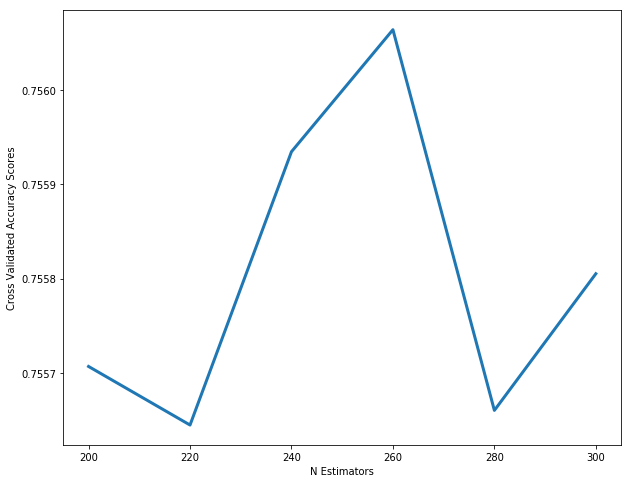

In [174]:
#Plot estimators versus scores
plt.figure(figsize = (10, 8))
plt.plot(estimators, cv_scores, linewidth = 3)
plt.xlabel("N Estimators")
plt.ylabel("Cross Validated Accuracy Scores");

In [175]:
sorted(zip(cv_scores, estimators), reverse = True)[0]

(0.75606361124789778, 260)

In [25]:
ada = AdaBoostClassifier(n_estimators= 260)

In [26]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=260, random_state=None)

In [27]:
ada.score(X_test, y_test)

0.7535968848996832

In [29]:
preds = ada.predict(X_test)

In [30]:
precision_score(y_test, preds)

0.5595836324479541

In [31]:
recall_score(y_test, preds)

0.19989742274650596

In [33]:
cm = confusion_matrix(y_test, preds)
cm

array([[42556,  2454],
       [12480,  3118]])

In [34]:
cross_val_score(ada, X, y, cv = 5, scoring= "roc_auc", n_jobs= -1, verbose = 2)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] .......................................................  - 3.4min
[CV]  ................................................................
[CV] .......................................................  - 3.4min
[CV] .......................................................  - 3.4min
[CV] .......................................................  - 3.4min
[CV] .......................................................  - 1.7min


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.1min finished


array([0.73770398, 0.73624144, 0.72907363, 0.7208766 , 0.72333534])

In [38]:
(0.73770398 + 0.73624144 + 0.72907363 + 0.7208766 + 0.72333534)/5

0.729446198

In [39]:
cross_val_score(ada, X, y, cv = 5, scoring= "accuracy", n_jobs= -1, verbose = 2).mean()

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] .......................................................  - 3.5min
[CV]  ................................................................
[CV] .......................................................  - 3.5min
[CV] .......................................................  - 3.5min
[CV] .......................................................  - 3.5min
[CV] .......................................................  - 1.7min


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.2min finished


0.7565936589233804

# KNN Classifier

In [190]:
X = lcdf.drop(['total_pymnt', 'emp_title', 'total_rec_int', 'loan_status'], axis= 1)
y = lcdf.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 123)

In [191]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [192]:
#Create new param_grid
neighbors_range = range(3, 13, 2)
param_grid_knn = {}
param_grid_knn["kneighborsclassifier__n_neighbors"] = neighbors_range
param_grid_knn

{'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11]}

In [ ]:
#Pass in pipe into GridSearchCV function, 
grid_knn_pipe = RandomizedSearchCV(estimator = pipe, param_grid= param_grid_knn, cv = 5, scoring = "accuracy")

#Fit on original versions of data
grid_knn_pipe.fit(X, y)

#Best scores and params
grid_knn_pipe.best_score_

In [ ]:
grid_knn_pipe.best_estimator_

# PCA | AdaBoost

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier

In [73]:
lcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183660 entries, 1 to 421094
Data columns (total 89 columns):
num_tl_120dpd_2m              183660 non-null float64
mo_sin_old_il_acct            183660 non-null float64
percent_bc_gt_75              183660 non-null float64
bc_util                       183660 non-null float64
bc_open_to_buy                183660 non-null float64
dti                           183660 non-null float64
num_rev_accts                 183660 non-null float64
delinq_2yrs                   183660 non-null int64
inq_last_6mths                183660 non-null int64
revol_bal                     183660 non-null int64
open_acc                      183660 non-null int64
pub_rec                       183660 non-null int64
total_acc                     183660 non-null int64
num_bc_tl                     183660 non-null int64
funded_amnt                   183660 non-null int64
int_rate                      183660 non-null float64
installment                   183660 non-

In [189]:
# We do not want total_rec_int or total_pymnt since they are post application metrics... 

X = lcdf.drop(['emp_title', 'total_rec_int', 'total_pymnt', 'loan_status'], axis= 1)
y = lcdf.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33,
                                                   random_state = 123)

In [190]:
# Standarize features
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [191]:
#Intialize PCA object
#We're deliberating leaving the n_components parameters alone
pca = PCA()

#Fit and transform wine_s use pca
lcdf_pca = pca.fit_transform(X_s)

#Number of components
pca.n_components_

85

In [ ]:
# try in tensorflow or h2o.ai 
lcdf_pca.to_csv("LCDF_PCA_new.csv", sep= "\t")

In [78]:
pca.explained_variance_ratio_[:44].sum()
# ~85% of the explained variance is within 40 PC's. 

0.8512792813477468

In [79]:
pca.explained_variance_ratio_[:2].sum()

0.17462822055619753

In [81]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

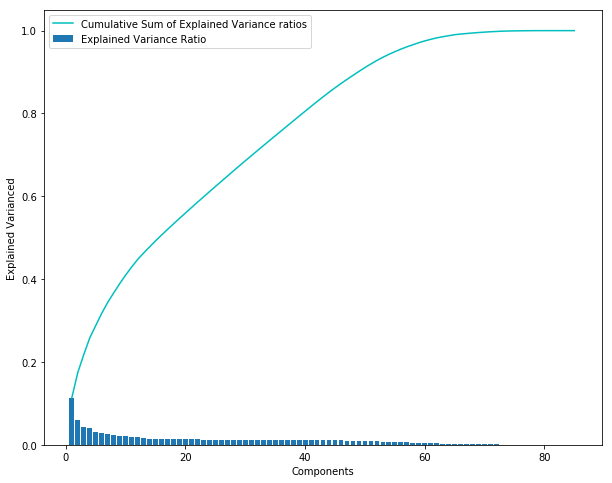

In [82]:
plt.figure(figsize=(10, 8))

components = range(1, pca.n_components_ +1)

plt.bar(components, pca.explained_variance_ratio_, label = "Explained Variance Ratio")
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), 
         c = "c", label = "Cumulative Sum of Explained Variance ratios")

plt.xlabel("Components")
plt.ylabel("Explained Varianced")
plt.legend();

In [83]:
#Component 1, top 20 weights
for comp, col in sorted(zip(pca.components_[0], lcdf.columns), reverse = True)[:20]:
    print comp, col
    
    # Top 5 weights: open_acc, chargeoff_within_12_mths, total_rev_hi_lim, total_il_high_credit_limit, num_rev_accts

0.2627670296424945 open_acc
0.2625832174922607 chargeoff_within_12_mths
0.262011104725809 total_rev_hi_lim
0.24740696931561101 total_il_high_credit_limit
0.2410256634880828 num_rev_accts
0.2337414260186937 total_acc
0.22976601670491328 num_bc_tl
0.22590239351961242 num_sats
0.22563141018928332 num_actv_bc_tl
0.21937844175781077 num_rev_tl_bal_gt_0
0.21530449508768484 num_accts_ever_120_pd
0.20965655004810851 policy_code
0.1681516497352457 tot_cur_bal
0.16659064141811675 bc_open_to_buy
0.15976573663984775 revol_bal
0.15595746441886496 pct_tl_nvr_dlq
0.1494154828693681 tot_coll_amt
0.14641501426326003 num_il_tl
0.14453187950152177 funded_amnt
0.14453187950152174 pub_rec_bankruptcies


In [116]:
#Component 2, top 20 weights
for comp, col in sorted(zip(pca.components_[1], lcdf.columns), reverse = True)[:20]:
    print comp, col
    
    # Top 5 weights: acc_open_past_24mths, tot_coll_amt, tot_cur_bal, pub_rec_bankruptcies, funded_amnt

0.3224929328681275 acc_open_past_24mths
0.28982059356559614 tot_coll_amt
0.28363950701682744 tot_cur_bal
0.22460166806918855 pub_rec_bankruptcies
0.22460166806918852 funded_amnt
0.20828645816977345 installment
0.19210958741513204 revol_bal
0.1822313740513786 mo_sin_old_rev_tl_op
0.1769818089765357 mo_sin_rcnt_tl
0.17228608706209736 pct_tl_nvr_dlq
0.16112198481936837 annual_inc
0.15768814672421752 loan_amnt
0.1410292578888691 mo_sin_rcnt_rev_tl_op
0.12598736536873456 num_rev_tl_bal_gt_0
0.11838649137438571 bc_util
0.11553005027108691 num_tl_op_past_12m
0.10583311707770084 percent_bc_gt_75
0.1000777614071962 policy_code
0.08653739237777008 num_tl_90g_dpd_24m
0.08092006517571486 mo_sin_old_il_acct


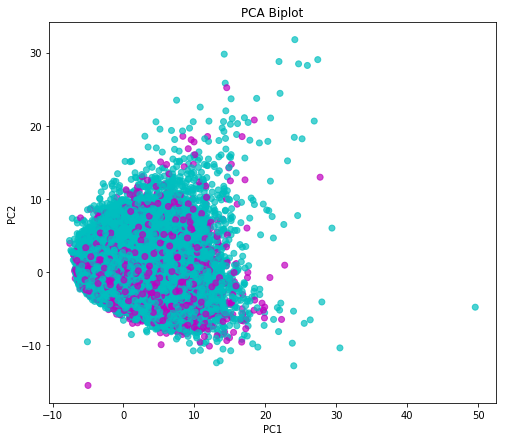

In [84]:
# PCA biplot:
colors = y.map({0:"c", 1:"m"})

plt.figure(figsize=(8,7))
plt.scatter(lcdf_pca[:, 0], lcdf_pca[:, 1], c=colors, alpha=.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot");

In [85]:
#default base estimator is DT. Will use LogisticReg in ada2 below:

ada = AdaBoostClassifier(n_estimators= 50, learning_rate= 50, random_state = 123)

In [202]:
lcdf_pca_df = pd.DataFrame(X)
lcdf_pca_df.shape

(183660, 30)

Just an experiment to see the first 30 PC's in action with Tensorflor projector. I'd like to see how many clusters there may be within the internal structure of the dataset. Would love to explore when I have more time!

In [203]:
# try in tensorflow or h2o.ai 
lcdf_pca_df.to_csv("LCDF_PCA.csv", sep= "\t")

In [87]:
X = lcdf_pca[:,:2]
y = lcdf.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 123)

In [88]:
ada.fit(X_train, y_train)

ada.score(X_train, y_train)

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:166: RuntimeWarning: invalid value encountered in divide
  sample_weight /= sample_weight_sum
/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight

0.744620160582518

In [ ]:
# Not bad considering we are only using 2 PC's, let's see if there's a difference if we use only half of the PC's

In [89]:
# At 44 PC's, we have ~85% variance from the original dataset. 

X = lcdf_pca[:,:44]
y = lcdf.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 123)

In [90]:
ada.fit(X_train, y_train)

ada.score(X_train, y_train)

0.744620160582518

In [91]:
ada.score(X_test, y_test)

0.7426412354804647

In [128]:
y.value_counts(normalize=True)

0    0.743967
1    0.256033
Name: loan_status, dtype: float64

In [94]:
# Let's look at the entire PCA set

X = lcdf_pca[:,:85]
y = lcdf.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 123)

In [96]:
ada.fit(X_train, y_train)

ada.score(X_train, y_train)

0.744620160582518

In [97]:
ada.score(X_test, y_test)

0.7426412354804647

In [99]:
cross_val_score(ada, X, y, cv = 5, scoring = "accuracy", n_jobs= -1).mean()

0.7439671132885088

In [104]:
precision_score(y_test, preds)

0.3870837611852721

In [105]:
accuracy_score(y_test, preds)

0.6410374868004224

In [45]:
# now with LogisticRegression as the base_estimator. See if there's a difference:

ada2 = AdaBoostClassifier(base_estimator= LogisticRegression())

In [ ]:
ada2.fit(X_train, y_train)

ada2.score(X_train, y_train)

In [102]:
ada2.score(X_test, y_test)

0.7537288806758183

In [ ]:
#Both scores are the same with LogisticRegression and DecisionTree as the base_estimators...

In [106]:
pred_ada = ada2.predict(X_test)
confusion_matrix(y_test, pred_ada)

array([[42639,  2371],
       [12555,  3043]])

In [107]:
precision_score(y_test, pred_ada)

0.5620613224972294

In [108]:
recall_score(y_test, pred_ada)

0.19508911398897294

In [ ]:
cross_val_score(ada2, X, y, cv = 5, n_jobs= -1, scoring = "roc_auc").mean()

In [14]:
ada2

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [ ]:
#Intialize time variable
t = time()

#Create list of estimator values
estimators = range(50, 550, 100)

#Intialize cross validation scores list
cv_scores = []

#Iterate over estimators values, fit models, and then append scores to cv_scores
for est in estimators:
    model = AdaBoostClassifier(n_estimators = est)
    score = cross_val_score(model, X, y, cv = 5, scoring = "accuracy").mean()
    cv_scores.append(score)
    
#Print difference in time
print (time() - t)

In [ ]:
#Derive best estimator value
sorted(zip(cv_scores, estimators), reverse = True)[0]

In [ ]:
# Put through Domain Knowledge test with pca/ada2 model & total loan loss function!

In [ ]:
df.shape

In [ ]:
df = lcdf[["loan_amnt", "int_rate", "loan_status"]]

In [ ]:
probs = ada2.predict_proba(X_test)
preds = threshold(probs, thres= 0.5)
preds = pd.DataFrame(preds, index= df.index, columns = (0, "predicted"))
preds.drop(0, axis = 1, inplace = True)
preds.head()

In [607]:
df.drop("predicted", axis= 1, inplace= True)

In [141]:
df = lcdf[["loan_amnt", "int_rate", "loan_status"]]

In [608]:
df = pd.concat([df, preds], axis= 1)
df.head()

,loan_amnt,int_rate,term,loan_status,predicted
161305,25425,15.61,60.0,1,1
268128,20000,12.69,60.0,0,0
354385,24000,6.92,36.0,0,0
91472,20000,9.99,36.0,0,0
245200,4500,13.33,36.0,1,1


In [609]:
total_loss_series = df.apply(total_loss_function, axis = 1)

In [611]:
total_loss_series.sum()

-28489193.80056568

In [612]:
results = []

thres_array = np.arange(0, 1, 0.05)

for i in thres_array:
    preds = threshold(probs, thres= i)
    df["predicted"] = preds
    total_loss_series = df.apply(total_loss_function, axis = 1)
    results.append(total_loss_series.sum())
results

[-1162384635.1087117,
 -1180826085.166569,
 -1254740658.8257058,
 -1330834218.9007,
 -1374984259.652595,
 -1402704514.6383502,
 -1420985025.137521,
 -1443366969.479977,
 -1473657029.3301947,
 -1503559104.6508236,
 -1528863106.2799747,
 -1550077748.3982863,
 -1566455541.4446836,
 -1577657528.6107028,
 -1584961634.289488,
 -1587076162.858227,
 -1564734083.0874863,
 -1428974954.5700936,
 -1145712389.0442996,
 -650026786.4257059]

In [613]:
sorted(zip(results, thres_array), reverse = True)

[(-650026786.4257059, 0.9500000000000001),
 (-1145712389.0442996, 0.9),
 (-1162384635.1087117, 0.0),
 (-1180826085.166569, 0.05),
 (-1254740658.8257058, 0.1),
 (-1330834218.9007, 0.15000000000000002),
 (-1374984259.652595, 0.2),
 (-1402704514.6383502, 0.25),
 (-1420985025.137521, 0.30000000000000004),
 (-1428974954.5700936, 0.8500000000000001),
 (-1443366969.479977, 0.35000000000000003),
 (-1473657029.3301947, 0.4),
 (-1503559104.6508236, 0.45),
 (-1528863106.2799747, 0.5),
 (-1550077748.3982863, 0.55),
 (-1564734083.0874863, 0.8),
 (-1566455541.4446836, 0.6000000000000001),
 (-1577657528.6107028, 0.65),
 (-1584961634.289488, 0.7000000000000001),
 (-1587076162.858227, 0.75)]

In [614]:
650026786.4257059/len(df)

14157.17709736918

In [ ]:
# ~$9,500 average in interest per borrower that we're missing!!!

In [ ]:
#Range of estimators in the model
est_range = range(1, 301, 60)

#Dictionary of parameter values 
param_grid_ada = {}
param_grid_ada["n_estimators"] = est_range

In [ ]:
grid_ada = RandomizedSearchCV(AdaBoostClassifier(), param_distributions= param_grid_ada, n_iter= 5, cv= 5, 
                              scoring= "roc_auc", random_state= 123)

In [ ]:
grid_ada.fit(X, y)

In [ ]:
grid_ada.best_score_

In [ ]:
grid_ada.best_params_

In [501]:
cross_val_score(AdaBoostClassifier(n_estimators= 100), X, y, cv = 5, scoring = "precision").mean()

0.9812145884850375

In [272]:
# let's put lcdf_pca into a DataFrame so that we can call feature_importances_ by X.columns

X = lcdf_pca_df
y = lcdf.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [259]:
ada2.fit(X_train, y_train)

ada2.score(X_train, y_train)

0.9626580632578097

In [276]:
# re initializing so that we can view the X.columns name. PCA transform function takes the labels away!!
X = lcdf.drop('loan_status', axis= 1)
y = lcdf.loan_status

In [278]:
# Top feature importances here for Adaboost Classifer model
sorted(zip(ada2.feature_importances_, X.columns), reverse= True)[:20]

[(0.18, 'purpose_moving'),
 (0.16, 'purpose_major_purchase'),
 (0.12, 'purpose_educational'),
 (0.1, 'purpose_credit_card'),
 (0.08, 'purpose_home_improvement'),
 (0.06, 'percent_bc_gt_75'),
 (0.04, 'purpose_debt_consolidation'),
 (0.04, 'pub_rec'),
 (0.04, 'emp_length_7 years'),
 (0.02, 'total_pymnt'),
 (0.02, 'tot_hi_cred_lim'),
 (0.02, 'pct_tl_nvr_dlq'),
 (0.02, 'num_tl_op_past_12m'),
 (0.02, 'num_tl_30dpd'),
 (0.02, 'num_actv_rev_tl'),
 (0.02, 'mo_sin_rcnt_rev_tl_op'),
 (0.02, 'mo_sin_old_il_acct'),
 (0.02, 'delinq_2yrs'),
 (0.0, 'total_rev_hi_lim'),
 (0.0, 'total_rec_int')]

In [ ]:
components = range(1, 81, 10)
scores = []

for i in components:
    pca = PCA(n_components=i)
    pca_data = pca.fit_transform(X_s)
    score = cross_val_score(K(),
                            pca_data, y, cv = 5, scoring = "accuracy").mean()
    scores.append(score)
    
plt.plot(components, scores)
plt.xlabel("N Components")
plt.ylabel("CV Accuracy Score");

In [244]:
preds2 = ada2.predict(X_test)

In [245]:
cm2 = confusion_matrix(y_test, preds2)
cm2

array([[44540,   534],
       [ 1736, 13798]])

In [246]:
ps = precision_score(y_test, preds2)
rs = recall_score(y_test, preds2)

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

# Just about 11% of the bad loans are being approved.. much better than before with the DT & RF Model.

The precision score is 96.27 and the recall score is 88.82


In [ ]:
# ROC_AUC

In [ ]:
#Derive probabilities of class 1 from the test set
test_probs = ada2.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

In [ ]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth= 8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
#Cross validated roc_auc score
cross_val_score(ada2, X, y, cv=5, scoring="roc_auc").mean()

# XG / GBM Model

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
X = lcdf.drop(['emp_title', 'total_rec_int', 'total_pymnt', 'loan_status'], axis= 1)
y = lcdf.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 123)

In [101]:
depths_range = range(1, 16, 5)
feature_range = [30, 50, 80]

param_grid_xgb = {}
param_grid_xgb = {"max_depth": depths_range, "max_features": feature_range}
param_grid_xgb

{'max_depth': [1, 6, 11], 'max_features': [30, 50, 80]}

In [102]:
grid_xgb = RandomizedSearchCV(estimator = GradientBoostingClassifier(), n_jobs= -1, 
                              param_distributions = param_grid_xgb, cv = 5, scoring = "accuracy", 
                              n_iter = 9, verbose = 2)

In [103]:
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_features=30, max_depth=1 ....................................
[CV] max_features=30, max_depth=1 ....................................
[CV] max_features=30, max_depth=1 ....................................
[CV] max_features=30, max_depth=1 ....................................
[CV] ........................... max_features=30, max_depth=1 -  14.6s
[CV] max_features=30, max_depth=1 ....................................
[CV] ........................... max_features=30, max_depth=1 -  14.9s
[CV] max_features=50, max_depth=1 ....................................
[CV] ........................... max_features=30, max_depth=1 -  15.2s
[CV] max_features=50, max_depth=1 ....................................
[CV] ........................... max_features=30, max_depth=1 -  15.1s
[CV] max_features=50, max_depth=1 ....................................
[CV] ........................... max_features=30, max_depth=1 -  13.7s
[CV] max_features

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 37.0min


[CV] .......................... max_features=30, max_depth=11 -19.0min
[CV] max_features=50, max_depth=11 ...................................
[CV] .......................... max_features=30, max_depth=11 -18.4min
[CV] max_features=50, max_depth=11 ...................................
[CV] .......................... max_features=50, max_depth=11 -29.0min
[CV] max_features=50, max_depth=11 ...................................
[CV] .......................... max_features=50, max_depth=11 -28.3min
[CV] max_features=80, max_depth=11 ...................................
[CV] .......................... max_features=50, max_depth=11 -28.7min
[CV] max_features=80, max_depth=11 ...................................
[CV] .......................... max_features=50, max_depth=11 -29.4min
[CV] max_features=80, max_depth=11 ...................................
[CV] .......................... max_features=50, max_depth=11 -28.4min
[CV] max_features=80, max_depth=11 ...................................
[CV] .

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 136.5min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params={}, iid=True, n_iter=9, n_jobs=-1,
          param_distributions={'max_features': [30, 50, 80], 'max_depth': [1, 6, 11]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=2)

In [99]:
print X.shape
print y.value_counts(normalize= True)

(183660, 85)
0    0.743967
1    0.256033
Name: loan_status, dtype: float64


In [104]:
grid_xgb.best_params_

{'max_depth': 6, 'max_features': 50}

In [105]:
grid_xgb.best_score_

0.7599145076878068

In [106]:
xgb = GradientBoostingClassifier(max_features = 50, max_depth=6, verbose= 2, criterion= "friedman_mse")

In [107]:
xgb.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1150            2.30m
         2           1.0977            2.26m
         3           1.0836            2.24m
         4           1.0715            2.24m
         5           1.0612            2.23m
         6           1.0523            2.20m
         7           1.0445            2.16m
         8           1.0380            2.14m
         9           1.0323            2.12m
        10           1.0275            2.09m
        11           1.0231            2.06m
        12           1.0193            2.04m
        13           1.0158            2.02m
        14           1.0127            1.99m
        15           1.0099            1.96m
        16           1.0073            1.93m
        17           1.0049            1.91m
        18           1.0026            1.89m
        19           1.0005            1.88m
        20           0.9986            1.90m
        21           0.9967            1.87m
        2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=50, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=2,
              warm_start=False)

In [108]:
xgb.score(X_train, y_train)

0.7827341286610539

In [109]:
xgb.score(X_test, y_test)

0.7558738120380147

In [110]:
xgb.score(X, y)

0.7738701949254057

In [111]:
preds = xgb.predict(X_test)

In [115]:
recall_score(y_test, preds)

0.2090011539941018

In [114]:
precision_score(y_test, preds)

0.5701294158796782

In [122]:
cross_val_score(xgb, X, y, cv = 5, scoring= "accuracy", n_jobs= -1, verbose= 2).mean()

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         1           1.1164            8.92m
         1           1.1169            8.83m
         1           1.1162            8.82m
         1           1.1158            8.94m
         2           1.0994            8.67m
         2           1.0996            8.50m
         2           1.0989            8.55m
         2           1.0985            8.50m
         3           1.0860            8.54m
         3           1.0857            8.47m
         3           1.0855            8.50m
         3           1.0848          

        44           0.9776            4.58m
        44           0.9733            4.61m
        44           0.9780            4.65m
        45           0.9768            4.49m
        44           0.9748            4.67m
        45           0.9724            4.52m
        45           0.9772            4.56m
        45           0.9741            4.57m
        46           0.9762            4.40m
        46           0.9715            4.43m
        46           0.9765            4.47m
        47           0.9754            4.30m
        46           0.9733            4.48m
        47           0.9707            4.34m
        47           0.9757            4.37m
        48           0.9746            4.22m
        47           0.9725            4.40m
        48           0.9700            4.26m
        48           0.9751            4.28m
        49           0.9740            4.14m
        48           0.9718            4.31m
        49           0.9691            4.17m
        49

        89           0.9521           50.23s
        89           0.9492           50.15s
        91           0.9509           40.38s
        90           0.9489           45.56s
        90           0.9515           45.67s
        90           0.9457           45.55s
        92           0.9506           35.80s
        91           0.9483           40.96s
        91           0.9511           41.04s
        91           0.9452           40.98s
        93           0.9502           31.28s
        92           0.9480           36.32s
        92           0.9449           36.32s
        92           0.9506           36.46s
        94           0.9495           26.82s
        93           0.9477           31.70s
        93           0.9444           31.79s
        93           0.9499           31.95s
        95           0.9489           22.39s
        94           0.9472           27.21s
        94           0.9439           27.25s
        96           0.9487           17.86s
        94

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.4min finished


0.7586517969596419

In [121]:
cross_val_score(xgb, X, y, cv = 5, scoring= "roc_auc", n_jobs= -1, verbose= 2).mean()

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         1           1.1164            8.61m
         1           1.1169            8.53m
         1           1.1162            8.54m
         1           1.1158            8.55m
         2           1.0994            8.57m
         2           1.0996            8.46m
         2           1.0989            8.44m
         2           1.0985            8.49m
         3           1.0860            8.47m
         3           1.0857            8.37m
         3           1.0855            8.39m
         3           1.0848          

        44           0.9780            4.70m
        44           0.9776            4.76m
        44           0.9733            4.79m
        45           0.9772            4.63m
        44           0.9748            4.81m
        45           0.9768            4.68m
        46           0.9765            4.54m
        45           0.9741            4.72m
        45           0.9724            4.71m
        46           0.9762            4.60m
        47           0.9757            4.45m
        46           0.9733            4.63m
        46           0.9715            4.63m
        47           0.9754            4.50m
        48           0.9751            4.37m
        47           0.9707            4.55m
        47           0.9725            4.56m
        48           0.9746            4.43m
        49           0.9743            4.29m
        48           0.9700            4.46m
        48           0.9718            4.47m
        49           0.9740            4.33m
        50

        89           0.9492           52.34s
        90           0.9515           47.12s
        89           0.9462           52.59s
        91           0.9511           42.22s
        90           0.9489           47.52s
        91           0.9509           42.45s
        90           0.9457           47.82s
        92           0.9506           37.53s
        92           0.9506           37.61s
        91           0.9483           42.73s
        91           0.9452           43.03s
        93           0.9499           32.86s
        92           0.9480           37.90s
        93           0.9502           32.89s
        92           0.9449           38.15s
        93           0.9477           33.10s
        94           0.9493           28.22s
        94           0.9495           28.21s
        93           0.9444           33.38s
        94           0.9472           28.36s
        95           0.9489           23.50s
        95           0.9486           23.55s
        94

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.6min finished


0.7336334163313444

In [113]:
cm = confusion_matrix(y_test, preds)
cm

array([[42552,  2458],
       [12338,  3260]])

GBM ROC_AUC Curve, Learning Curve, + Thresholds

In [116]:
from sklearn.model_selection import learning_curve

In [117]:
#Derive probabilities of class 1 from the test set
test_probs = xgb.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

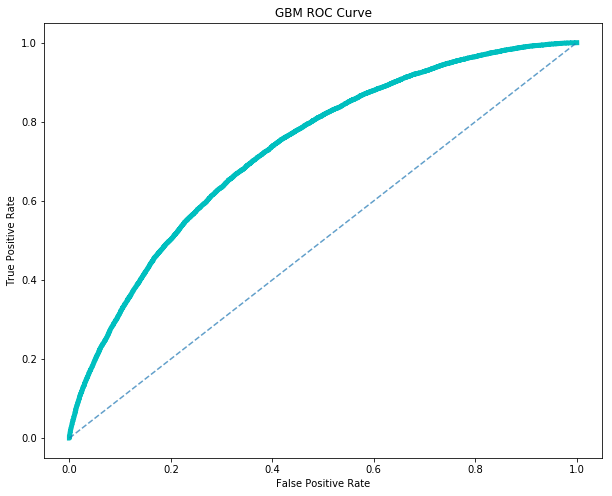

In [118]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth= 5, c = "c")
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GBM ROC Curve")
plt.show();

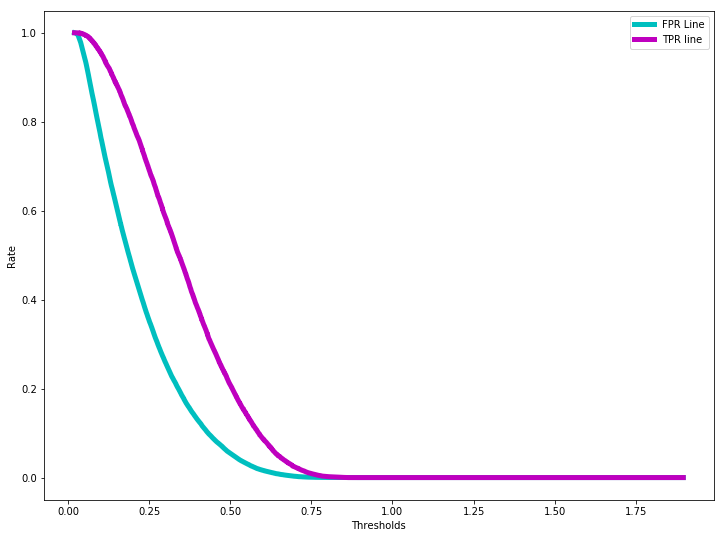

In [120]:
plt.figure(figsize=(12,9))
plt.plot(thres, fpr, linewidth=5, label = "FPR Line", c = 'c')
plt.plot(thres, tpr, linewidth=5, label = "TPR line", c = 'm')
plt.xlabel("Thresholds")
plt.ylabel("Rate")
plt.title("GBM Thresholds")
plt.legend()
plt.show();

In [123]:
def thres_acc(t, yt, tp):
    labels = np.where(tp>=t, 1, 0)
    return accuracy_score(yt, labels)

In [124]:
#Generate thresholds and pass them into function

thresholds = np.linspace(0, 1, 50)
acc_scores = [thres_acc(i, y_test, test_probs) for i in thresholds]

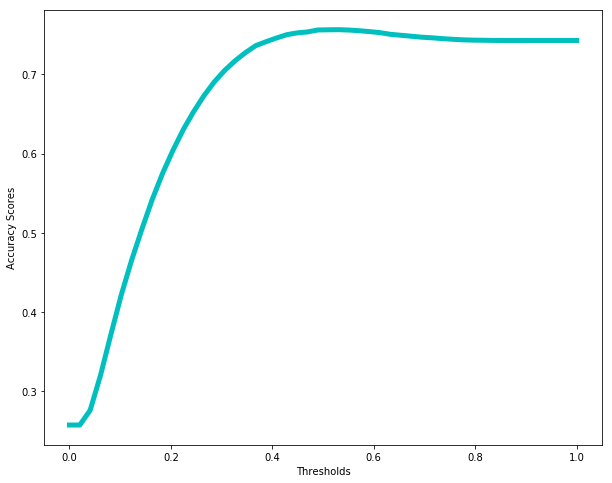

In [126]:
#Plot thresholds vs accuracy scores
plt.figure(figsize=(10,8))
plt.plot(thresholds, acc_scores, linewidth=5, c = "c")
plt.xlabel("Thresholds")
plt.ylabel("Accuracy Scores")
plt.show()

In [130]:
thres_score_dict = dict(zip(thresholds, acc_scores))
sorted(thres_score_dict.items(), key = lambda x:x[1], reverse=True)[0][0]

0.5306122448979591

In [ ]:
# at .53, the accuracy is maximized, but we need to put it through the domain function below for total loan loss

In [ ]:
# Skip, takes too long
#1. Create CV training and test scores for various training set sizes

train_sizes, train_scores, test_scores = learning_curve(xgb, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy', 
                                                        # 10 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

#2.We need to compute average of each 5-fold cv
train_scores = train_scores.mean(axis =1)
test_scores = test_scores.mean(axis = 1)

#3. Create lines
plt.plot(train_sizes, train_scores, color="c",  label="Training score")
plt.plot(train_sizes, test_scores, color="m", label="Testing score")

#4. Create plot
plt.title("GBM Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
plt.legend(loc="best")
plt.figure(figsize= (10, 8))
plt.show();

# GBM Domain Knowledge Test!!

In [127]:
def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output

In [173]:
df = X_test

In [174]:
X_test.shape

(60608, 85)

In [175]:
probs = xgb.predict_proba(X_test)

In [176]:
y_test.tail()

416683    0
8404      0
402348    1
69610     0
130168    0
Name: loan_status, dtype: int64

In [177]:
preds = threshold(probs, thres= .95)
preds = pd.DataFrame(preds, index = df.index, columns= (0, "predicted"))
preds.drop(0, axis= 1, inplace= True)
preds.tail()

,predicted
416683,0
8404,0
402348,0
69610,0
130168,0


In [178]:
df = X_test[["loan_amnt", "int_rate", "term"]]
df = pd.concat([df, y_test], axis = 1)

In [179]:
df.tail()

,loan_amnt,int_rate,term,loan_status
416683,14625,12.39,36.0,0
8404,22000,11.99,36.0,0
402348,16000,19.99,60.0,1
69610,1500,13.18,36.0,0
130168,34675,12.29,36.0,0


In [181]:
df = pd.concat([df, preds], axis = 1)

In [182]:
df.tail()

# http://www.amortization-calc.com/
# Try calculating Index 402348, and see how much interest he pays over time.

,loan_amnt,int_rate,term,loan_status,predicted
416683,14625,12.39,36.0,0,0
8404,22000,11.99,36.0,0,0
402348,16000,19.99,60.0,1,0
69610,1500,13.18,36.0,0,0
130168,34675,12.29,36.0,0,0


In [131]:
def total_loss_function(data):
    # Bad Loan, predicted as Good Loan. (FN) 
    if data.loan_status == 1 and data.predicted == 0:
        return ((data.term * data.loan_amnt * (data.int_rate/12/100)) / (1 - (1 + (data.int_rate/12/100))**(-data.term))) - data.loan_amnt
    # Good Loan, predicted as Bad Loan (FP)
    elif data.loan_status == 0 and data.predicted == 1:
        return ((data.term * data.loan_amnt * (data.int_rate/12/100)) / (1 - (1 + (data.int_rate/12/100))**(-data.term))) - data.loan_amnt
    else:
        return 0

In [185]:
total_loss_series = df.apply(total_loss_function, axis = 1)
total_loss_series

161305    11356.824976
268128        0.000000
354385        0.000000
91472         0.000000
245200      984.205478
391808     1861.092130
91372         0.000000
219879        0.000000
177778     8098.727141
376915        0.000000
119295        0.000000
339444    15275.419994
86040         0.000000
381940     4571.458710
360923        0.000000
164254        0.000000
392349     1414.931597
299819     5360.153381
313649        0.000000
168060        0.000000
295562        0.000000
339051        0.000000
367260        0.000000
76084         0.000000
280463        0.000000
344482        0.000000
208029        0.000000
281519        0.000000
204195        0.000000
50735         0.000000
              ...     
106777        0.000000
26257         0.000000
182857        0.000000
116043        0.000000
323324        0.000000
382111        0.000000
50976         0.000000
284560        0.000000
356974        0.000000
86525         0.000000
282480        0.000000
420140        0.000000
181896     

In [184]:
95329642.425301/len(df)

1572.888767576904

In [147]:
results = []

array = np.arange(0, 1, 0.05)

for i in array:
    preds = threshold(probs, thres= i)
    df["predicted"] = preds
    total_loss_series = df.apply(total_loss_function, axis = 1)
    results.append(total_loss_series.sum())
results

[182616731.81801626,
 182616731.81801626,
 182616731.81801626,
 182664592.04783872,
 182985795.94693038,
 183955443.90662476,
 185519863.28972214,
 187421546.22888568,
 189960968.8185338,
 191122991.7225242,
 191525634.44286832,
 190165506.15066278,
 187387163.63908285,
 181625121.11439613,
 172143561.80420068,
 159999424.5697678,
 144453131.72980082,
 128088956.9916588,
 112318780.97681224,
 98545243.3231593]

In [148]:
sorted(zip(results, array), reverse= False)

[(98545243.3231593, 0.9500000000000001),
 (112318780.97681224, 0.9),
 (128088956.9916588, 0.8500000000000001),
 (144453131.72980082, 0.8),
 (159999424.5697678, 0.75),
 (172143561.80420068, 0.7000000000000001),
 (181625121.11439613, 0.65),
 (182616731.81801626, 0.0),
 (182616731.81801626, 0.05),
 (182616731.81801626, 0.1),
 (182664592.04783872, 0.15000000000000002),
 (182985795.94693038, 0.2),
 (183955443.90662476, 0.25),
 (185519863.28972214, 0.30000000000000004),
 (187387163.63908285, 0.6000000000000001),
 (187421546.22888568, 0.35000000000000003),
 (189960968.8185338, 0.4),
 (190165506.15066278, 0.55),
 (191122991.7225242, 0.45),
 (191525634.44286832, 0.5)]

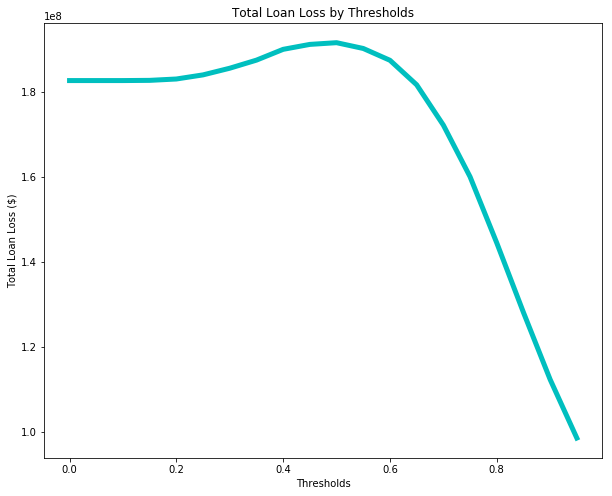

In [149]:
#Plot thresholds vs accuracy scores
plt.figure(figsize=(10,8))
plt.plot(array, results, linewidth=5, c = "c")
plt.xlabel("Thresholds")
plt.ylabel("Total Loan Loss ($)")
plt.title("Total Loan Loss by Thresholds")
plt.show()

Essentially we want to minimize Total Loan Loss, which is the Amortization Interest for both FP & FN results. The model shows that .95 is the threshold where we get the best prediction, and are able to lose less money for both our investors and fallout for borrower quality. 

In [186]:
98545243 - 95329642 
# The answers are slightly different at .95 threshold. Might have to check the functions again... but still close..

3215601

Random Forest Balanced

In [712]:
# RF with Balanced PCA dataset: 
### this is on the old dataset which includes total_pmnts etc. That's why the score is so high!

print cross_val_score(RandomForestClassifier(class_weight="balanced"), 
                X, y, cv = 5, scoring="recall").mean()
print cross_val_score(RandomForestClassifier(class_weight="balanced"), 
                X, y, cv = 5, scoring="precision").mean()
print cross_val_score(RandomForestClassifier(class_weight="balanced"), 
                X, y, cv = 5, scoring="accuracy").mean()

0.8567496383612705
0.9974116303169523
0.9610637487154203


In [714]:
#Intialize parameter grid

#Range of estimators to test
est_range = range(1, 50, 5)
depths_range = range(2, 11, 2)

#Dictionary of parameter values 
param_grid_rf = {}

param_grid_rf = {"criterion": ["gini", "entropy"], "max_depth": depths_range, "n_estimators": est_range}
param_grid_rf["min_samples_split"] = [2, 10]
param_grid_rf["max_features"] = [1, 20, 40, 80]

In [ ]:
#Intialize RandomizedSearchCV grid with n_iter = 10; RandomForestClassifier balanced on PCA dataset:

grid_rf_bal = RandomizedSearchCV(RandomForestClassifier(class_weight= "balanced"), n_iter = 10,
                            param_distributions = param_grid_rf, cv = 5, scoring = "accuracy")

t = time()

#Fit grid on data
grid_rf_bal.fit(X, y)

print time() - t

In [718]:
grid_rf_bal.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 40,
 'min_samples_split': 2,
 'n_estimators': 26}

In [720]:
grid_rf_bal.best_score_

0.997125122508984

In [723]:
cross_val_score(RandomForestClassifier(class_weight= "balanced",criterion="gini", max_depth= 10, max_features= 40, min_samples_split= 2,
                                      n_estimators = 26), X, y, cv = 5, scoring = "accuracy").mean()

0.9971686456814357

In [901]:
grid_rf_bal = RandomForestClassifier(class_weight= "balanced",criterion="gini", max_depth= 10, max_features= 40, min_samples_split= 2,
                                      n_estimators = 26)

In [902]:
grid_rf_bal.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=40,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=26, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [903]:
grid_rf_bal.score(X_train, y_train)

0.998480317264246

In [904]:
pred_rf_bal = grid_rf_bal.predict(X_test)
cm = confusion_matrix(y_test, pred_rf_bal)
cm = pd.DataFrame(cm, columns = ("predicted good loan", "predicted bad loan"))
cm

,predicted good loan,predicted bad loan
0,45005,5
1,151,15447


In [905]:
precision_score(y_test, pred_rf_bal)

0.9996764172922599

In [906]:
recall_score(y_test, pred_rf_bal)

0.9903192717015002

In [941]:
accuracy_score(y_test, pred_rf_bal)

0.9974260823653643

In [942]:
probs = grid_rf_bal.predict_proba(X_test)

In [911]:
preds = threshold(probs, thres= .5)
preds = pd.DataFrame(preds, index = df.index, columns= (0, "predicted"))
preds.drop(0, axis= 1, inplace= True)
preds.head()

,predicted
161305,1
268128,0
354385,0
91472,0
245200,1


In [912]:
df.shape

(60608, 4)

In [913]:
df = pd.concat([df, preds], axis = 1)

In [943]:
# from index #416683:
((36 * 14625 * (12.39/100/12)) / (1 - (1 + (12.39/100/12))**(-36))) - 14625

2960.56823388864

In [ ]:
df = X_test[["loan_amnt", "int_rate", "term", "loan_status"]]

In [909]:
df.drop("predicted", axis = 1, inplace= True)

In [914]:
df.tail()

,loan_amnt,int_rate,term,loan_status,predicted
416683,14625,12.39,36.0,0,0
8404,22000,11.99,36.0,0,0
402348,16000,19.99,60.0,1,1
69610,1500,13.18,36.0,0,0
130168,34675,12.29,36.0,0,0


In [915]:
total_loss_series = df.apply(total_loss_function, axis = 1)

# http://www.amortization-calc.com/
# cross reference the amortization interest using the inputs from df.tail(). They match well below.

In [944]:
total_loss_series.head()

161305    11356.824976
268128     7113.635306
354385     2646.220304
91472      3228.994567
245200      984.205478
dtype: float64

In [947]:
618756.6722647768/len(df)

10.209158399300039

In [811]:
def total_loss_function(data):
    # Bad Loan, predicted as Good Loan. (FN) 
    if data.loan_status == 1 and data.predicted == 0:
        return ((data.term * data.loan_amnt * (data.int_rate/12/100)) / (1 - (1 + (data.int_rate/12/100))**(-data.term))) - data.loan_amnt
    # Good Loan, predicted as Bad Loan (FP)
    elif data.loan_status == 0 and data.predicted == 1:
        return ((data.term * data.loan_amnt * (data.int_rate/12/100)) / (1 - (1 + (data.int_rate/12/100))**(-data.term))) - data.loan_amnt
    else:
        return 0

In [919]:
results = []

array = np.arange(0, 1, 0.05)

for i in array:
    preds = threshold(probs, thres= i)
    df["predicted"] = preds
    total_loss_series = df.apply(total_loss_function, axis = 1)
    results.append(total_loss_series.sum())
results

[182616731.81801626,
 271461952.791283,
 274288307.0675589,
 275286462.785016,
 276042526.0292874,
 276403754.8516834,
 276673321.4477212,
 276902109.27916497,
 277005624.50640017,
 277154452.584106,
 277327617.57105684,
 277375943.40031874,
 277421976.8437769,
 277518426.1334141,
 277524464.0165331,
 277501890.8351324,
 277424028.1000977,
 277154992.3713562,
 276236690.0835102,
 267887142.97318006]

In [940]:
267887142.97318006/len(df)

# average per user

4419.996419172057

In [962]:
sorted(zip(results, array), reverse= False)

[(182616731.81801626, 0.0),
 (267887142.97318006, 0.9500000000000001),
 (271461952.791283, 0.05),
 (274288307.0675589, 0.1),
 (275286462.785016, 0.15000000000000002),
 (276042526.0292874, 0.2),
 (276236690.0835102, 0.9),
 (276403754.8516834, 0.25),
 (276673321.4477212, 0.30000000000000004),
 (276902109.27916497, 0.35000000000000003),
 (277005624.50640017, 0.4),
 (277154452.584106, 0.45),
 (277154992.3713562, 0.8500000000000001),
 (277327617.57105684, 0.5),
 (277375943.40031874, 0.55),
 (277421976.8437769, 0.6000000000000001),
 (277424028.1000977, 0.8),
 (277501890.8351324, 0.75),
 (277518426.1334141, 0.65),
 (277524464.0165331, 0.7000000000000001)]

# Learning Curve | Random Forest Balanced

In [922]:
X = lcdf.drop("loan_status", axis = 1)
y = lcdf.loan_status

In [923]:
X.shape

(183660, 81)

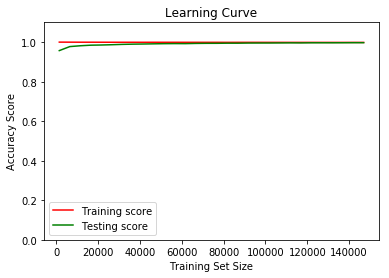

In [948]:
from sklearn.model_selection import learning_curve

#1. Create CV training and test scores for various training set sizes

train_sizes, train_scores, test_scores = learning_curve(grid_rf_bal, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy', 
                                                        # 30 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 30))

#2.We need to compute average of each 5-fold cv
train_scores = train_scores.mean(axis =1)
test_scores = test_scores.mean(axis = 1)

#3. Create lines
plt.plot(train_sizes, train_scores, color="r",  label="Training score")
plt.plot(train_sizes, test_scores, color="g", label="Testing score")

#4. Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
plt.legend(loc="best")
plt.figure(figsize= (10, 8))
plt.show();

In [ ]:
# did not use..

import sklearn.pipeline

select = sklearn.feature_selection.SelectKBest(k=100)
clf = sklearn.ensemble.RandomForestClassifier()

steps = [('feature_selection', select),
        ('random_forest', clf)]

pipeline = sklearn.pipeline.Pipeline(steps)

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=0.33, random_state=42)

### fit your pipeline on X_train and y_train
pipeline.fit( X_train, y_train )
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = pipeline.predict( X_test )
### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report( y_test, y_prediction )
### and print the report
print(report)

In [959]:
p = grid_rf_bal.predict_proba(X_test)[:, 1]

In [960]:
roc_auc_score(y_test, p)

0.999710989721939

In [951]:
#Derive probabilities of class 1 from the test set
test_probs = grid_rf_bal.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

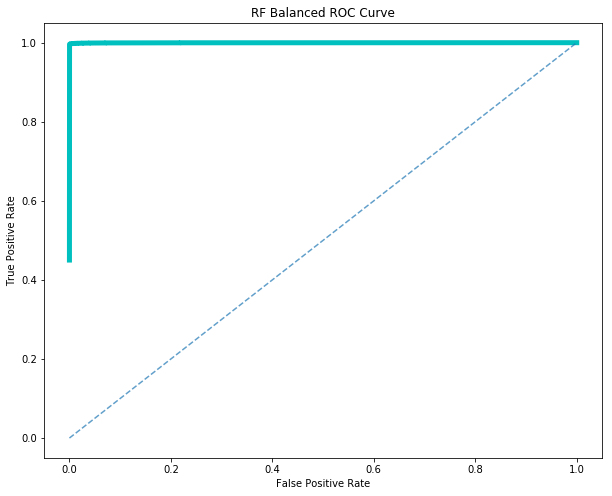

In [956]:

#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth= 5, c = "c")
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RF Balanced ROC Curve")
plt.show();

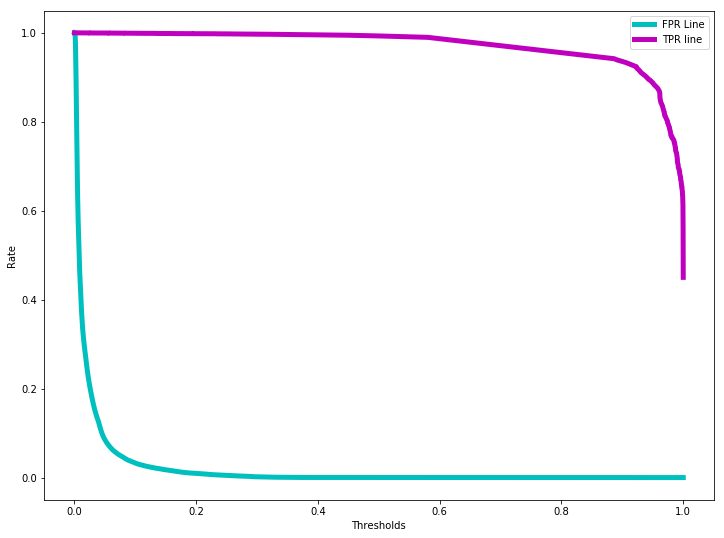

In [957]:
plt.figure(figsize=(12,9))
plt.plot(thres, fpr, linewidth=5, label = "FPR Line", c = 'c')
plt.plot(thres, tpr, linewidth=5, label = "TPR line", c = 'm')
plt.xlabel("Thresholds")
plt.ylabel("Rate")
plt.legend()
plt.show();

In [958]:
cross_val_score(grid_rf_bal, X, y, cv =5, scoring = "roc_auc", n_jobs= -1, verbose= 2).mean()

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] .......................................................  - 1.0min
[CV] .......................................................  - 1.0min
[CV]  ................................................................
[CV] .......................................................  - 1.0min
[CV] .......................................................  - 1.1min
[CV] .......................................................  -  33.4s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


0.9989099182223512

# Ensembles

In [47]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

In [21]:
def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")
    

In [ ]:
print("%s..." % name, end =" ", flush=False)

In [22]:
SEED = 123

In [ ]:
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
done


In [ ]:
!pip install mlens

In [ ]:
# You need ML-Ensemble for this figure: you can install it with: pip install mlens
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

In [ ]:
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - y_test.values).corr(), inflate=False)
plt.show()

In [ ]:
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(y_test, P.mean(axis=1)))

In [ ]:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_test, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(y_test, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()
    
plot_roc_curve(ytest, P.values, P.mean(axis=1), list(P.columns), "ensemble")

# Deep Learning

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_moons, make_regression

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical

In [63]:
def keras_clf(model):
    #Intialize
    model = Sequential()
    # Add the first layer
    model.add(Dense(100, activation= "relu", input_shape = (n_cols,)))
    # Add the second layer or 2nd Node
    model.add(Dense(100, activation = "relu"))
    # Add the output layer with softmax activation function
    model.add(Dense(n_unique, activation = "softmax"))
    #Use adam optimizer
    model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

In [71]:
X = lcdf.drop(['emp_title', 'total_rec_int', 'total_pymnt', 'loan_status'], axis= 1)
y = lcdf.loan_status

scale = StandardScaler()

X_s = scale.fit_transform(X)

# number of columns will be 8 for the number of features
n_cols = X_s.shape[1]

y_binary = to_categorical(y)

n_unique = len(pd.unique(y))

In [73]:
X_s.shape

(183660, 85)

In [76]:
#Intialize
model = Sequential()
# Add the first layer
model.add(Dense(300, activation= "relu", input_shape = (n_cols,)))
# Add the second layer or 2nd Node
model.add(Dense(200, activation = "relu"))    
# Add the third layer 
model.add(Dense(100, activation = "relu"))  
# 4th
model.add(Dense(50, activation = "relu"))  
# 5th
model.add(Dense(100, activation = "relu")) 
# 6th
model.add(Dense(50, activation = "relu")) 

# Add the output layer with softmax activation function
model.add(Dense(n_unique, activation = "sigmoid"))
#Use adam optimizer, and categorical_crossentropy which is "log loss"
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
m = model.fit(X_s, y_binary, epochs = 15, validation_split= .33, verbose= True)

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 300)               25800     
_________________________________________________________________
dense_45 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_47 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_48 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_49 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 102       
Total para

In [187]:
###########
# 4th
model.add(Dense(200, activation = "relu"))  
# 5th
model.add(Dense(100, activation = "relu")) 
# 6th
model.add(Dense(100, activation = "relu")) 
# 7th
model.add(Dense(50, activation = "relu"))
# 8th
model.add(Dense(1, activation = "relu"))

In [68]:
m.history

{'acc': [0.7478139323193576,
  0.7568345089861326,
  0.7587361440711116,
  0.7604264863654262,
  0.7621330819471571,
  0.7628726067047948,
  0.7638559308279298,
  0.7648392549510648,
  0.7664970906589212,
  0.7687969313766666,
  0.770210967719026,
  0.7719256899541529,
  0.7745749764327277,
  0.7752007281474499,
  0.7782644735539576],
 'loss': [0.5222589894700522,
  0.5030273358376544,
  0.4995507750252934,
  0.4970828399037453,
  0.4949212295188785,
  0.49286650043371205,
  0.49073471759465614,
  0.48852597706317047,
  0.48633057597484636,
  0.48379472465875983,
  0.4812297803035457,
  0.4782816947312518,
  0.47505110326507866,
  0.47210730092580433,
  0.4684284260738145],
 'val_acc': [0.7570122756071805,
  0.7568472808870116,
  0.756154303062302,
  0.7578042502639916,
  0.7569297782470961,
  0.7552963305174234,
  0.7549993400211193,
  0.756616288278775,
  0.7517489440337909,
  0.748102560718057,
  0.7557088173178458,
  0.7490265311510031,
  0.7550158394931362,
  0.7534483896515312,
 

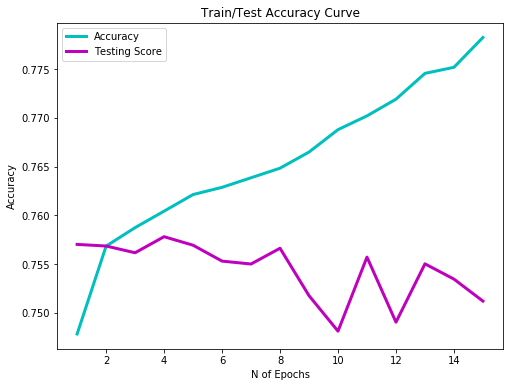

In [78]:
plt.figure(figsize= (8, 6))
epochs = range(1, 16)

plt.plot(epochs, m.history["acc"], linewidth = 3, c = "c", label = "Accuracy")
plt.plot(epochs, m.history["val_acc"], linewidth = 3, c = "m", label = "Testing Score")
plt.legend(loc= 'best')
plt.xlabel("N of Epochs")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy Curve")
plt.show();

In [20]:
#Predictions

preds = model.predict(X_test)
preds[:10]

array([[0.2519172 , 0.3622877 ],
       [0.6827516 , 0.1338463 ],
       [0.5394639 , 0.19689138],
       [0.4274412 , 0.3505307 ],
       [0.33267364, 0.47190383],
       [0.31587932, 0.4431421 ],
       [0.6323146 , 0.19171512],
       [0.5520641 , 0.07507653],
       [0.77263784, 0.06014509],
       [0.35762566, 0.13218158]], dtype=float32)

In [26]:
#Put predictions into dataframe for sorting purposes

pred_df = pd.DataFrame()
pred_df["feature"] = list(X_s)
pred_df["preds"] = list(preds)

In [30]:
pred_df.shape

(183660, 2)

In [ ]:
#Sort dataframe

pred_df.sort_values("feature", inplace= True)

# NLP was done on a separate notebook:
https://github.com/darrenklee79/DS-SF-40/blob/master/NLP_Word2Vec.ipynb

In [502]:
#Imports
from time import time
import pandas as pd
pd.set_option("max.colwidth", 500)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA, TruncatedSVD, NMF
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
from textblob import TextBlob



Please see separate Python Notebook with Word2Vec algo

In [462]:
df_nlp = lcdf

In [772]:
# define X and y
X = df_nlp.emp_title.sample(10000, random_state= 120)
y = df_nlp.loan_status.sample(10000, random_state= 120)

#Null accuracy
print y.value_counts(normalize=True)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=1)

In [774]:
X.iloc[255]

'Branch Manager'

In [291]:
# define a function that accepts text and returns a list of stems
def word_tokenize_stem(emp_title):
    words = TextBlob(emp_title).words
    stemmer = SnowballStemmer("english")
    
    return [stemmer.stem(word) for word in words]

# define a function that accepts text and returns a list of lemons (noun version)

def word_tokenize_lemma(emp_title):
    words = TextBlob(emp_title).words
    return [word.lemmatize() for word in words]

# define a function that accepts text and returns a list of lemons (verb version)
def word_tokenize_lemma_verb(emp_title):
    words = TextBlob(emp_title).words
    return [word.lemmatize(pos = "v") for word in words]

In [292]:
def text_model_evaluator(vect):
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    print "Features: ", X_train_dtm.shape[1]
    print "Training Score: ", nb.score(X_train_dtm, y_train)
    print "Testing Score: ", nb.score(X_test_dtm, y_test)

In [775]:
#Intialize vectorizer object
vect = CountVectorizer(lowercase= True, binary= True, stop_words='english')

#Fit and transform with training data
X_train_dtm = vect.fit_transform(X_train)

#Transform the testing data
X_test_dtm = vect.transform(X_test)

In [776]:
vect

CountVectorizer(analyzer=u'word', binary=True, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [777]:
X_train_dtm.shape

(6700, 1847)

In [778]:
X_test_dtm.shape

(3300, 1847)

In [779]:
# first 25 features
vect.get_feature_names()[:25]

[u'03e',
 u'11',
 u'12',
 u'13',
 u'1670',
 u'1lt',
 u'1st',
 u'3rd',
 u'5th',
 u'7th',
 u'911',
 u'aa',
 u'academic',
 u'academy',
 u'access',
 u'account',
 u'accountant',
 u'accounting',
 u'accounts',
 u'accouting',
 u'accoynt',
 u'acct',
 u'acctg',
 u'accts',
 u'achr']

In [780]:
pd.DataFrame(X_train_dtm.toarray(), columns = vect.get_feature_names()).head(n = 10)

,03e,11,12,13,1670,1lt,1st,3rd,5th,7th,...,works,workstation,writer,wtu,xray,yard,yardman,yardmaster,youth,zanjero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [781]:
# Term Frequency with CountVectorizer

vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())
tf.shape

(6700, 1878)

In [783]:
#Intialize vectorizer with binary = true
vect = CountVectorizer(binary=True, lowercase= True)

#Fit and transform the text and sum up the counts
df = vect.fit_transform(X_train).toarray().sum(axis=0)
#Put results into dataframe
pd.DataFrame(df.reshape(1, 1878), columns=vect.get_feature_names())

,03e,11,12,13,1670,1lt,1st,3rd,5th,7th,...,works,workstation,writer,wtu,xray,yard,yardman,yardmaster,youth,zanjero
0,1,3,1,3,1,1,1,1,1,1,...,1,1,4,1,2,3,1,1,4,1


In [784]:
#Intialize vectorizer
vect = TfidfVectorizer()

#Fit and transform using tfidf and input results into dataframe
pd.DataFrame(vect.fit_transform(X_train).toarray(), columns = vect.get_feature_names()).head()

,03e,11,12,13,1670,1lt,1st,3rd,5th,7th,...,works,workstation,writer,wtu,xray,yard,yardman,yardmaster,youth,zanjero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [694]:
# define X and y
X = df_nlp.emp_title.sample(10000, random_state=120)
y = df_nlp.loan_status.sample(10000, random_state=120)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=123)

In [785]:
#Null accuracy
y.value_counts(normalize=True)

0    0.7455
1    0.2545
Name: loan_status, dtype: float64

In [786]:
#TfIDF the whole corpus. Remove stop words.

#Intialize vectorizer
vect = TfidfVectorizer(binary= True, lowercase= True, stop_words="english")

#fit and transform data
X_dtm = vect.fit_transform(X)

In [787]:
#Intialize model
nb = MultinomialNB()

#Fit and score model
nb.fit(X_dtm, y)
nb.score(X_dtm, y)

0.77680000000000005

In [788]:
#Intialize vectorizer 
vect = TfidfVectorizer(stop_words= "english", lowercase= True, binary=True)

#Fit and transform on the training data
X_train_dtm = vect.fit_transform(X_train)

#Transform the testing data witht the vectorizer
X_test_dtm = vect.transform(X_test)

#Intialize model
nb = MultinomialNB()
#Fit it on training data
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [789]:
nb.score(X_train_dtm, y_train)

0.77641791044776121

In [790]:
nb.score(X_test_dtm, y_test)

0.74181818181818182

In [791]:
cross_val_score(MultinomialNB(), X_dtm, y, cv = 5, scoring = "accuracy").mean()

0.73650000000000004

In [792]:
preds = nb.predict(X_test_dtm)

In [793]:
cm = confusion_matrix(y_test, preds)
cm_pd = pd.DataFrame(cm)
cm_pd

,0,1
0,2434,54
1,798,14


In [794]:
precision_score(y_test, preds)

0.20588235294117646

In [795]:
recall_score(y_test, preds)

0.017241379310344827

In [796]:
new_text = ["cfo"]
new_text_transform = vect.transform(new_text)

In [797]:
nb.predict_proba(new_text_transform)
# this title is more likely to default

array([[ 0.8597971,  0.1402029]])

In [798]:
new_text = ["Counter"]
new_text_transform = vect.transform(new_text)
# less likely to default under this emp_title

In [799]:
nb.predict_proba(new_text_transform)

array([[ 0.74134328,  0.25865672]])

In [800]:
df_nb = df_nlp[["emp_title", "loan_status"]].sample(1000, random_state = 123)
df_nb.shape

(1000, 2)

In [710]:
df_nb.loan_status.value_counts(normalize=True)

0    0.741
1    0.259
Name: loan_status, dtype: float64

In [711]:
#Assign X and y
X = df_nb.emp_title
y = df_nb.loan_status

In [ ]:
# from GridSearch parameters below!
'tfidfvectorizer__analyzer': <function __main__.word_tokenize_stem>,
 'tfidfvectorizer__binary': True,
 'tfidfvectorizer__lowercase': False,
 'tfidfvectorizer__max_features': 5000,
 'tfidfvectorizer__ngram_range': (1, 2)}

In [807]:
#Intialize vectorizer with default settings
vect = TfidfVectorizer(analyzer= word_tokenize_stem, binary= True, stop_words= 'english', 
                       lowercase= True, ngram_range = (1,2))
#Fit and transform X
X_dtm = vect.fit_transform(X)
#Intialize, fit, and score model on training data
nb = MultinomialNB()
nb.fit(X_dtm,y)
nb.score(X_dtm,y)

0.77739999999999998

In [808]:
tokens = vect.get_feature_names()
len(tokens)

2289

In [809]:
#Print random slice of features
tokens[-20:]

[u'worker/cas',
 u'worker/co',
 u'workforc',
 u'workout',
 u'workplac',
 u'workstat',
 u'writer',
 u'wtu',
 u'ww',
 u'x',
 u'x-ray',
 u'xray',
 u'xray/ct',
 u'yard',
 u'yardman/whs',
 u'yardmast',
 u'year',
 u'youth',
 u'zanjero',
 u'zone']

In [810]:
#How many times does a word appear in each class
nb.feature_count_

array([[ 2.59735691,  1.        ,  9.01230928, ...,  1.56911117,
         0.90546566,  0.88823914],
       [ 0.44671862,  0.        ,  0.52358339, ...,  1.31360472,
         0.        ,  0.        ]])

In [811]:
#Shape
nb.feature_count_.shape

(2, 2289)

In [812]:
#Returns out counts of each word marked "0"
good_loan_token_count = nb.feature_count_[0,:]
good_loan_token_count[:10]

array([  2.59735691,   1.        ,   9.01230928,   0.        ,
         1.        ,   0.6132077 ,  11.75520643,   4.54684112,
         0.62292403,   3.87845298])

In [813]:
#Returns out counts of each word marked "1"
bad_loan_token_count = nb.feature_count_[1,:]
bad_loan_token_count[:10]

array([ 0.44671862,  0.        ,  0.52358339,  0.5       ,  0.        ,
        0.        ,  5.40454028,  2.88778337,  0.        ,  1.91304873])

In [814]:
# create a DataFrame of tokens with their separate ham and spam counts
df_nb_tokens = pd.DataFrame({'token':tokens, 
                          'good_loan':good_loan_token_count, 
                          'bad_loan':bad_loan_token_count}).set_index('token')

#Randomly select data 
df_nb_tokens.sample(10, random_state=120)

,bad_loan,good_loan
token,,
aminastr,0.000000,1.000000
crane,0.902668,0.702975
reader,0.000000,0.599495
literaci,0.725505,0.000000
frame,0.519815,0.957863
sqa,1.000000,0.000000
titl,1.660025,1.660025
sound,0.898136,0.825854
es,0.000000,0.722326


In [815]:
# add 1 to good and bad loan counts to avoid dividing by 0
df_nb_tokens['good_loan'] = df_nb_tokens.good_loan + 1
df_nb_tokens['bad_loan'] = df_nb_tokens.bad_loan + 1
df_nb_tokens.sample(10, random_state=120)

,bad_loan,good_loan
token,,
aminastr,1.000000,2.000000
crane,1.902668,1.702975
reader,1.000000,1.599495
literaci,1.725505,1.000000
frame,1.519815,1.957863
sqa,2.000000,1.000000
titl,2.660025,2.660025
sound,1.898136,1.825854
es,1.000000,1.722326


In [816]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([ 7455.,  2545.])

In [817]:
nb.class_count_[1]

2545.0

In [818]:
# convert the ham and spam counts into frequencies
df_nb_tokens['good_loan'] = df_nb_tokens.good_loan / nb.class_count_[0]
df_nb_tokens['bad_loan'] = df_nb_tokens.bad_loan / nb.class_count_[1]
df_nb_tokens.sample(10, random_state=120)

,bad_loan,good_loan
token,,
aminastr,0.000393,0.000268
crane,0.000748,0.000228
reader,0.000393,0.000215
literaci,0.000678,0.000134
frame,0.000597,0.000263
sqa,0.000786,0.000134
titl,0.001045,0.000357
sound,0.000746,0.000245
es,0.000393,0.000231


In [819]:
# calculate the ratio of badto-good for each token
df_nb_tokens['bad_loan_ratio'] = df_nb_tokens.bad_loan / df_nb_tokens.good_loan
df_nb_tokens.sample(10, random_state=120)

,bad_loan,good_loan,bad_loan_ratio
token,,,
aminastr,0.000393,0.000268,1.464637
crane,0.000748,0.000228,3.272764
reader,0.000393,0.000215,1.831374
literaci,0.000678,0.000134,5.054475
frame,0.000597,0.000263,2.273883
sqa,0.000786,0.000134,5.858546
titl,0.001045,0.000357,2.929273
sound,0.000746,0.000245,3.045238
es,0.000393,0.000231,1.700766


In [820]:
# Top 20 worst emp_title tokens!

df_nb_tokens.sort_values(by= "bad_loan_ratio", ascending= False).head(20)

,bad_loan,good_loan,bad_loan_ratio
token,,,
founder,0.001307,0.000134,9.744398
staf,0.001228,0.000134,9.153713
cma,0.001179,0.000134,8.787819
unload,0.001179,0.000134,8.787819
manaer,0.001142,0.000134,8.510689
maintainc,0.001139,0.000134,8.489432
salesman,0.001138,0.000134,8.485359
geophysicist,0.001137,0.000134,8.474637
mammograph,0.001123,0.000134,8.370570


In [752]:
# Top 20 best emp_title tokens!

df_nb_tokens.sort_values(by= "bad_loan_ratio", ascending= True).head(20)

,bad_loan,good_loan,bad_loan_ratio
token,,,
it,0.003861,0.010469,0.368816
system,0.003861,0.009761,0.395567
analyst,0.009905,0.023023,0.430229
of,0.005787,0.013362,0.433115
mechan,0.003861,0.008829,0.437296
financ,0.003861,0.007945,0.485959
vp,0.003861,0.007818,0.493884
execut,0.006607,0.013202,0.500487
sr,0.007907,0.015059,0.525090


In [821]:
#Make pipeline for tfidfvectorizer and naive bayes model
pipe_tf = make_pipeline(TfidfVectorizer(), MultinomialNB())

#Intialize parameters for tfidf vectorizer
param_grid_tf = {}
param_grid_tf["tfidfvectorizer__stop_words"] = ["english"]
param_grid_tf["tfidfvectorizer__max_features"] = [1000, 2500 ,5000, 7500,10000]
param_grid_tf["tfidfvectorizer__ngram_range"] = [(1,1), (1,2), (2,2)]
param_grid_tf["tfidfvectorizer__lowercase"] = [True, False]
param_grid_tf["tfidfvectorizer__binary"] = [True, False]
param_grid_tf["tfidfvectorizer__analyzer"] = ["word", word_tokenize_stem,
                                              word_tokenize_lemma, word_tokenize_lemma_verb]

In [822]:
#Randomized grid search with n_iter = 5
randsearch_tf = RandomizedSearchCV(pipe_tf, n_iter = 5,
                        param_distributions = param_grid_tf, cv = 5, scoring = "accuracy")

#Time the code 

t = time()

#Fit grid on data
randsearch_cv.fit(X, y)

#Print time difference

time() - t

62.867358922958374

In [ ]:
#Best params
randsearch_tf.best_params

In [762]:
#Best score
randsearch_cv.best_score_

0.733

In [753]:
#Assign list of features to tokens variable
tokens = vect.get_feature_names()
len(tokens)

603